In [1]:
import os
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm


import gc

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from src import DATA_PATH, ROOT_PATH
VERSION = 'clip'


# 前処理

In [2]:
food_values = pd.read_csv(os.path.join(DATA_PATH, "food_value.csv"))
resp = pd.read_csv(os.path.join(DATA_PATH, "data_responses_NCNP_2types.csv"))
res_L_mean = resp.groupby("img")["res_L"].mean()
res_H_mean = resp.groupby("img")["res_H"].mean()
res_T_mean = resp.groupby("img")["res_T"].mean()

from PIL import Image

image_dir = os.path.join(ROOT_PATH, "Database")
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])

# Load the data
image_rgb = pd.DataFrame(
    [
        np.array(Image.open(os.path.join(image_dir, img)).convert("RGB")).mean(
            axis=(0, 1)
        )
        for img in image_files
    ],
    columns=["R", "G", "B"],
    index=image_files,
)

In [3]:
gram_value_is_not_nan = ~np.isnan(food_values["grams_total"].values)
labels = np.array(
    [
        res_L_mean.values,
        res_H_mean.values,
        res_T_mean.values,
        food_values["kcal_100g"].values,
        food_values["protein_100g"].values,
        food_values["fat_100g"].values,
        food_values["carbs_100g"].values,
        food_values["kcal_total"].values,
        food_values["grams_total"].values,
        image_rgb["R"].values,
        image_rgb["G"].values,
        image_rgb["B"].values,
        food_values["is_processed_foods"].astype(int).values,
        food_values["is_testy"].astype(int).values,
    ]
)

labels.shape

(14, 896)

# 分析

## Ridge回帰

In [4]:
from src.analysis import (
    pearson_correlation,
    init_ridge_analysis,
    get_features_pc,
    search_best_binary,
    search_best_regression,
)
from src.const import index_name
gc.collect()
from src.analysis import run_ridge_analysis
# inn is is not nan

pipe_binary, pipe_regression, search_binary, search_regression = init_ridge_analysis()
data_len = 81
# result_dfs = pd.DataFrame(columns=np.arange(data_len))

# for type_ in ["obesity", "normal"]:
result_df = pd.DataFrame(index=index_name, columns=np.arange(data_len))
# result_df["type"] = type_
data_dir = os.path.join(ROOT_PATH, "tmp", VERSION, "intermediate_feature")
save_dir = os.path.join(
    DATA_PATH,
    "output",
    "activation_features_regression",
    VERSION
)
if not os.path.exists(save_dir):
    os.makedirs(save_dir, exist_ok=True)

result_df = run_ridge_analysis(
    result_df,
    pipe_binary,
    pipe_regression,
    search_binary,
    search_regression,
    labels,
    gram_value_is_not_nan,
    save_dir,
    data_dir,
    data_len,
    # is_pca=False,
)

  0%|          | 0/81 [00:00<?, ?it/s]

Layer 0
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.14291457750237302
Label 1 shape: (896,)
res_H_mean
-0.1822604275856352
Label 2 shape: (896,)
res_T_mean
-0.16623502793797718
Label 3 shape: (896,)
kcal_100g
-0.24712236912043517
Label 4 shape: (896,)
protein_100g
-0.6869059059770466
Label 5 shape: (896,)
fat_100g
-0.33427624157002156
Label 6 shape: (896,)
carbs_100g
-0.4966908761225777
Label 7 shape: (896,)
kcal_total
-0.08127075670721395
Label 8 shape: (896,)
grams_total
-1.0303962748159496
Label 9 shape: (896,)
red
0.9629182860867618
Label 10 shape: (896,)
green
0.9758965970522179
Label 11 shape: (896,)
blue
0.9847086028649116
Label 12 shape: (896,)
binary start
0.7
Label 13 shape: (896,)
binary start


  1%|          | 1/81 [00:11<15:30, 11.63s/it]

0.5777777777777777
Layer 1
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.3463580909703554
Label 1 shape: (896,)
res_H_mean
-0.07245459448749103
Label 2 shape: (896,)
res_T_mean
-0.3290112017804847
Label 3 shape: (896,)
kcal_100g
-0.32382613274371996
Label 4 shape: (896,)
protein_100g
-0.14678439371320717
Label 5 shape: (896,)
fat_100g
-0.2633995064373138
Label 6 shape: (896,)
carbs_100g
-0.4899805704527618
Label 7 shape: (896,)
kcal_total
-0.07186201471322917
Label 8 shape: (896,)
grams_total
-6437.512660673598
Label 9 shape: (896,)
red
0.9225511879442079
Label 10 shape: (896,)
green
0.9562894245629379
Label 11 shape: (896,)
blue
0.9705870280831681
Label 12 shape: (896,)
binary start
0.7
Label 13 shape: (896,)
binary start
0.6277777777777778


  2%|▏         | 2/81 [00:22<14:54, 11.32s/it]

Layer 2
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.6395536054011757
Label 1 shape: (896,)
res_H_mean
-0.5644804855474774
Label 2 shape: (896,)
res_T_mean
-0.5813248412462091
Label 3 shape: (896,)
kcal_100g
-1.0756651280149003
Label 4 shape: (896,)
protein_100g
-0.8562904594465321
Label 5 shape: (896,)
fat_100g
-0.9807519736141732
Label 6 shape: (896,)
carbs_100g
-0.722692978160481
Label 7 shape: (896,)
kcal_total
-1.2221050746697832
Label 8 shape: (896,)
grams_total
-2234.9858242066857
Label 9 shape: (896,)
red
0.8337318648047216
Label 10 shape: (896,)
green
0.8833187354710281
Label 11 shape: (896,)
blue
0.8790553496963935
Label 12 shape: (896,)
binary start


  4%|▎         | 3/81 [00:40<18:25, 14.18s/it]

0.6888888888888889
Label 13 shape: (896,)
binary start
0.5888888888888889
Layer 3
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.24354225071619018
Label 1 shape: (896,)
res_H_mean
0.16339472253145348
Label 2 shape: (896,)
res_T_mean
-0.15866309515679933
Label 3 shape: (896,)
kcal_100g
0.013639424236672748
Label 4 shape: (896,)
protein_100g
-0.026021184108030893
Label 5 shape: (896,)
fat_100g
-0.07179861928402942
Label 6 shape: (896,)
carbs_100g
0.08317812461700158
Label 7 shape: (896,)
kcal_total
0.03933384140727625
Label 8 shape: (896,)
grams_total
-0.49253576574227687
Label 9 shape: (896,)
red
0.8122697026427542
Label 10 shape: (896,)
green
0.9127276598593347
Label 11 shape: (896,)
blue
0.9341298418524758
Label 12 shape: (896,)
binary start
0.75
Label 13 shape: (896,)
binary start


  5%|▍         | 4/81 [00:45<13:39, 10.64s/it]

0.6388888888888888
Layer 4
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.0919916294372789
Label 1 shape: (896,)
res_H_mean
0.052779687006262566
Label 2 shape: (896,)
res_T_mean
0.0017064763988224874
Label 3 shape: (896,)
kcal_100g
0.03531809906617844
Label 4 shape: (896,)
protein_100g
-0.09606044125299129
Label 5 shape: (896,)
fat_100g
-0.059306247340996876
Label 6 shape: (896,)
carbs_100g
-0.12889300825055794
Label 7 shape: (896,)
kcal_total
-0.14337509586443686
Label 8 shape: (896,)
grams_total
-0.6717481065830531
Label 9 shape: (896,)
red
0.7664411665887044
Label 10 shape: (896,)
green
0.8735390026582938
Label 11 shape: (896,)
blue
0.8992328007761435
Label 12 shape: (896,)
binary start
0.7222222222222222
Label 13 shape: (896,)
binary start
0.6055555555555555


  6%|▌         | 5/81 [00:51<11:11,  8.83s/it]

Layer 5
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.878690006927586
Label 1 shape: (896,)
res_H_mean
-0.39266945006663945
Label 2 shape: (896,)
res_T_mean
-0.5662324272546864
Label 3 shape: (896,)
kcal_100g
-0.8460267771621037
Label 4 shape: (896,)
protein_100g
-1.140792875288724
Label 5 shape: (896,)
fat_100g
-1.2059823733883617
Label 6 shape: (896,)
carbs_100g
-1.0781257986678798
Label 7 shape: (896,)
kcal_total
-0.23536111696694606
Label 8 shape: (896,)
grams_total
-2.9969648518196212
Label 9 shape: (896,)
red
0.8344026277209977
Label 10 shape: (896,)
green
0.9101155736755834
Label 11 shape: (896,)
blue


  7%|▋         | 6/81 [01:08<14:44, 11.80s/it]

0.8940672429288236
Label 12 shape: (896,)
binary start
0.7222222222222222
Label 13 shape: (896,)
binary start
0.5666666666666667
Layer 6
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.03476042732643003
Label 1 shape: (896,)
res_H_mean
0.1647209173691152
Label 2 shape: (896,)
res_T_mean
0.1100953642998268
Label 3 shape: (896,)
kcal_100g
0.11470851935869886
Label 4 shape: (896,)
protein_100g
-0.010862708836784085
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.11317e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.81984e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.34821e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.50374e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.13126933117830009
Label 6 shape: (896,)
carbs_100g
0.049717363100284295
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.11317e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.81984e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.34821e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.04374e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.07949434799738198
Label 8 shape: (896,)
grams_total
-0.5787091956383592
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.11317e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.81984e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.34821e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.50374e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8496631484668375
Label 10 shape: (896,)
green
0.8907067045883703
Label 11 shape: (896,)
blue
0.9272966757379766
Label 12 shape: (896,)
binary start
0.7444444444444445


  9%|▊         | 7/81 [02:29<42:31, 34.48s/it]

Label 13 shape: (896,)
binary start
0.6166666666666667
Layer 7
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.03740260090006697
Label 1 shape: (896,)
res_H_mean
0.12294092067960183
Label 2 shape: (896,)
res_T_mean
0.052594975859879045
Label 3 shape: (896,)
kcal_100g
0.08140503955549516
Label 4 shape: (896,)
protein_100g
-0.03041611327828786
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.05131e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64861e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.379e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.89529e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.06763902176121972
Label 6 shape: (896,)
carbs_100g
0.028627290483850043
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.05131e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64861e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.379e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.89529e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

-0.06528445047234244
Label 8 shape: (896,)
grams_total
-0.36650593592738034
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.05131e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64861e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.379e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.89529e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.6173905212862096
Label 10 shape: (896,)
green
0.754937648648687
Label 11 shape: (896,)
blue
0.8638320175737609
Label 12 shape: (896,)
binary start
0.7722222222222223


 10%|▉         | 8/81 [03:50<59:54, 49.24s/it]

Label 13 shape: (896,)
binary start
0.5666666666666667
Layer 8
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.7156935222594458
Label 1 shape: (896,)
res_H_mean
-0.3463851900892507
Label 2 shape: (896,)
res_T_mean
-0.660710365906334
Label 3 shape: (896,)
kcal_100g
-0.5192382826952453
Label 4 shape: (896,)
protein_100g
-1.0181039722341483
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.3893e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarni

-0.6127138639658825
Label 6 shape: (896,)
carbs_100g
-0.6449935256533472
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.3893e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarni

-0.31914104261617715
Label 8 shape: (896,)
grams_total
-4214.341466447312
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.3893e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarni

0.8102318466839348
Label 10 shape: (896,)
green
0.8919839591245646
Label 11 shape: (896,)
blue
0.911375656955042
Label 12 shape: (896,)
binary start
0.7111111111111111


 11%|█         | 9/81 [08:33<2:26:50, 122.37s/it]

Label 13 shape: (896,)
binary start
0.55
Layer 9
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.0458968766819976
Label 1 shape: (896,)
res_H_mean
0.0832883862130327
Label 2 shape: (896,)
res_T_mean
-0.04626384121386251
Label 3 shape: (896,)
kcal_100g
-0.029179787017779235
Label 4 shape: (896,)
protein_100g
-0.05199035089430981
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.361e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.94262e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.22542e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.10033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.012285455802179879
Label 6 shape: (896,)
carbs_100g
-0.05183049997218392
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.361e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.94262e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.22542e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.10033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

-0.18997317871260777
Label 8 shape: (896,)
grams_total
-5226.393048663448
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.361e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.94262e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.22542e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.10033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.5110196317659415
Label 10 shape: (896,)
green
0.6603904567747643
Label 11 shape: (896,)
blue
0.7902730205738573
Label 12 shape: (896,)
binary start
0.6444444444444445


 12%|█▏        | 10/81 [09:51<2:08:17, 108.42s/it]

Label 13 shape: (896,)
binary start
0.6666666666666666
Layer 10
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.030250021177361086
Label 1 shape: (896,)
res_H_mean
0.035507498626392686
Label 2 shape: (896,)
res_T_mean
-0.011297113667018355
Label 3 shape: (896,)
kcal_100g
-0.02624500211593217
Label 4 shape: (896,)
protein_100g
-0.03322456654900652
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.66066e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.42612e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.98201e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.51559e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.1640637806108094
Label 6 shape: (896,)
carbs_100g
0.05804053399065334
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.66066e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.42612e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.98201e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.51559e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.4503750356973313
Label 8 shape: (896,)
grams_total
-0.04925486160654202
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.66066e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.42612e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.98201e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.51559e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.3529680024010027
Label 10 shape: (896,)
green
0.5811311674561843
Label 11 shape: (896,)
blue
0.7528904614975852
Label 12 shape: (896,)
binary start
0.7166666666666667


 14%|█▎        | 11/81 [11:06<1:54:38, 98.26s/it] 

Label 13 shape: (896,)
binary start
0.5722222222222222
Layer 11
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.6913544782474872
Label 1 shape: (896,)
res_H_mean
-0.6325421149301318
Label 2 shape: (896,)
res_T_mean
-0.4648508279374881
Label 3 shape: (896,)
kcal_100g
-0.7738162280798389
Label 4 shape: (896,)
protein_100g
-1.056802272133663
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. 

-0.833678438489539
Label 6 shape: (896,)
carbs_100g
-1.0855927041489593
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.48379e-

-1.8982791722934143
Label 8 shape: (896,)
grams_total
-7.294713336796564
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.48379e-

0.7360145970037495
Label 10 shape: (896,)
green
0.8861642302108763
Label 11 shape: (896,)
blue
0.8778920668407303
Label 12 shape: (896,)
binary start
0.75


 15%|█▍        | 12/81 [15:28<2:50:29, 148.25s/it]

Label 13 shape: (896,)
binary start
0.6055555555555555
Layer 12
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.1448741632979771
Label 1 shape: (896,)
res_H_mean
0.06196346700807298
Label 2 shape: (896,)
res_T_mean
-0.05104101220849522
Label 3 shape: (896,)
kcal_100g
-0.07976075342489297
Label 4 shape: (896,)
protein_100g
-0.16236552556688078
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.42967e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.90857e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.57848e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.07251e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.08300668816782553
Label 6 shape: (896,)
carbs_100g
-0.014956094417881038
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.42967e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.90857e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.57848e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.07251e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.13853402669348713
Label 8 shape: (896,)
grams_total
-0.889134603440195
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.42967e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.90857e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.57848e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.07251e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.4106318839302374
Label 10 shape: (896,)
green
0.6524570792383934
Label 11 shape: (896,)
blue
0.793348353243385
Label 12 shape: (896,)
binary start
0.7444444444444445


 16%|█▌        | 13/81 [16:49<2:24:50, 127.81s/it]

Label 13 shape: (896,)
binary start
0.6444444444444445
Layer 13
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.0799313711547831
Label 1 shape: (896,)
res_H_mean
-0.04940062165754022
Label 2 shape: (896,)
res_T_mean
-0.049005829173989435
Label 3 shape: (896,)
kcal_100g
-0.13304851809888185
Label 4 shape: (896,)
protein_100g
0.022076696417112518
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.40729e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.58845e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.35409e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.17841e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.10823915679070373
Label 6 shape: (896,)
carbs_100g
-0.12726990187724652
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.40729e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.58845e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.35409e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.17841e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.07914290199082608
Label 8 shape: (896,)
grams_total
-0.44186202371136774
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.40729e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.58845e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.35409e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.17841e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.3625452037297703
Label 10 shape: (896,)
green
0.5493112506663991
Label 11 shape: (896,)
blue
0.7681020213824337
Label 12 shape: (896,)
binary start
0.6055555555555555


 17%|█▋        | 14/81 [18:10<2:06:48, 113.57s/it]

Label 13 shape: (896,)
binary start
0.55
Layer 14
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.5962149843040112
Label 1 shape: (896,)
res_H_mean
-0.570108751399812
Label 2 shape: (896,)
res_T_mean
-0.5361748877855095
Label 3 shape: (896,)
kcal_100g
-0.7514699783205965
Label 4 shape: (896,)
protein_100g
-0.7902513465401093
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.01541e-11): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWa

-0.8431385784738248
Label 6 shape: (896,)
carbs_100g
-0.8224077373171452
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.01541e-11): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWa

-239.027306842169
Label 8 shape: (896,)
grams_total
-2.5034271799127277
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.01541e-11): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWa

0.775044960104453
Label 10 shape: (896,)
green
0.8782362631265233
Label 11 shape: (896,)
blue
0.8995012589684572
Label 12 shape: (896,)
binary start
0.7444444444444445


 19%|█▊        | 15/81 [22:29<2:53:08, 157.40s/it]

Label 13 shape: (896,)
binary start
0.6333333333333333
Layer 15
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.0773684759084261
Label 1 shape: (896,)
res_H_mean
-0.03443085726734463
Label 2 shape: (896,)
res_T_mean
0.007284512658181752
Label 3 shape: (896,)
kcal_100g
-0.07757055253361234
Label 4 shape: (896,)
protein_100g
-0.027648580540672985
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.94666e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.90541e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.09919e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.41595e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.08186585674886016
Label 6 shape: (896,)
carbs_100g
-0.212552518755855
Label 7 shape: (896,)
kcal_total
-0.6466834554302086
Label 8 shape: (896,)
grams_total
-1.1305005585252266
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.94666e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.90541e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.09919e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.41595e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.3995498253160884
Label 10 shape: (896,)
green
0.6241531435527468
Label 11 shape: (896,)
blue
0.7867383625078095
Label 12 shape: (896,)
binary start
0.6666666666666666


 20%|█▉        | 16/81 [24:49<2:44:58, 152.29s/it]

Label 13 shape: (896,)
binary start
0.5055555555555555
Layer 16
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.1401112126782973
Label 1 shape: (896,)
res_H_mean
-0.06826325947213063
Label 2 shape: (896,)
res_T_mean
-0.07134504671456576
Label 3 shape: (896,)
kcal_100g
-0.2721950701765965
Label 4 shape: (896,)
protein_100g
-0.19920654812165495
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.40223e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWa

-0.3043672958992816
Label 6 shape: (896,)
carbs_100g
-0.07151731954836071
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.40223e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWa

-0.23080832372368887
Label 8 shape: (896,)
grams_total
-0.054703084510091315
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.40223e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWa

0.4029787509757313
Label 10 shape: (896,)
green
0.5426768991110149
Label 11 shape: (896,)
blue
0.7234514610704845
Label 12 shape: (896,)
binary start
0.7444444444444445


 21%|██        | 17/81 [27:09<2:38:17, 148.40s/it]

Label 13 shape: (896,)
binary start
0.5888888888888889
Layer 17
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.09783318690899101
Label 1 shape: (896,)
res_H_mean
0.1999549153285295
Label 2 shape: (896,)
res_T_mean
0.053362230172709246
Label 3 shape: (896,)
kcal_100g
0.15900263385839442
Label 4 shape: (896,)
protein_100g
-0.19706317648901184
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.53405e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.37125e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.54453e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.86919e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

-0.049071143694986
Label 6 shape: (896,)
carbs_100g
-0.08687263484804619
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.53405e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.37125e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.54453e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.86919e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

-0.8623867621269419
Label 8 shape: (896,)
grams_total
-1.3496082920845454
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.53405e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.37125e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.54453e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.86919e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

0.8555397051020636
Label 10 shape: (896,)
green
0.9159026801377143
Label 11 shape: (896,)
blue
0.9282171629153725
Label 12 shape: (896,)
binary start
0.8166666666666667


 22%|██▏       | 18/81 [29:55<2:41:37, 153.94s/it]

Label 13 shape: (896,)
binary start
0.6444444444444445
Layer 18
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.036592269566167235
Label 1 shape: (896,)
res_H_mean
0.3899491519307803
Label 2 shape: (896,)
res_T_mean
0.15702018141340557
Label 3 shape: (896,)
kcal_100g
0.22465984516478976
Label 4 shape: (896,)
protein_100g
0.1339575921360603
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.05354e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.80273e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.04956e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.43393e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

0.0760083787086433
Label 6 shape: (896,)
carbs_100g
0.11688282867603583
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.05354e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.80273e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.43393e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.04956e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

-0.06592713991185395
Label 8 shape: (896,)
grams_total
-0.6089324147586135
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.05354e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.80273e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.43393e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.04956e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

0.7979097115541711
Label 10 shape: (896,)
green
0.8930451566962654
Label 11 shape: (896,)
blue
0.9156985189589981
Label 12 shape: (896,)
binary start
0.7888888888888889


 23%|██▎       | 19/81 [30:39<2:04:48, 120.79s/it]

Label 13 shape: (896,)
binary start
0.6388888888888888
Layer 19
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.05227797578298321
Label 1 shape: (896,)
res_H_mean
0.18953663219358674
Label 2 shape: (896,)
res_T_mean
0.08417971301782079
Label 3 shape: (896,)
kcal_100g
0.12295702071485559
Label 4 shape: (896,)
protein_100g
-0.045210629793392965
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.02413e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.43078e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02508e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.87374e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

-0.03623487161868599
Label 6 shape: (896,)
carbs_100g
0.00014379517214824222
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.02413e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.43078e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02508e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.87374e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

0.14590331829720382
Label 8 shape: (896,)
grams_total
-0.012338576857047867
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.02413e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.43078e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02508e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.87374e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

0.6502837626282398
Label 10 shape: (896,)
green
0.7788901784008609
Label 11 shape: (896,)
blue
0.900511879069992
Label 12 shape: (896,)
binary start
0.7277777777777777


 25%|██▍       | 20/81 [31:22<1:39:03, 97.43s/it] 

Label 13 shape: (896,)
binary start
0.6444444444444445
Layer 20
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.31808288216468417
Label 1 shape: (896,)
res_H_mean
0.2919094001122363
Label 2 shape: (896,)
res_T_mean
-0.21720548386183913
Label 3 shape: (896,)
kcal_100g
0.05421622393344583
Label 4 shape: (896,)
protein_100g
-0.13218593095100495
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.53523e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.49222e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.60052e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.31328e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.03522007298045349
Label 6 shape: (896,)
carbs_100g
-0.16907403512636066
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.53523e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.49222e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.60052e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.31328e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.46959756473922676
Label 8 shape: (896,)
grams_total
-63.75781664948144
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.53523e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.49222e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.60052e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.31328e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8361721467263336
Label 10 shape: (896,)
green
0.9008863519050693
Label 11 shape: (896,)
blue
0.9070768594429666
Label 12 shape: (896,)
binary start
0.8


 26%|██▌       | 21/81 [33:50<1:52:36, 112.60s/it]

Label 13 shape: (896,)
binary start
0.6277777777777778
Layer 21
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.03573598615909346
Label 1 shape: (896,)
res_H_mean
0.06182733989442979
Label 2 shape: (896,)
res_T_mean
0.08717299512278354
Label 3 shape: (896,)
kcal_100g
0.010133067804040219
Label 4 shape: (896,)
protein_100g
0.10184850413467827
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.61166e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.38398e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06986e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16287e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.03483873939337512
Label 6 shape: (896,)
carbs_100g
-0.13531787924218186
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.38398e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.61166e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06986e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16287e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.0007419324447702769
Label 8 shape: (896,)
grams_total
-0.46999596394650545
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.61166e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.38398e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06986e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16287e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.40263385036037036
Label 10 shape: (896,)
green
0.613806732933323
Label 11 shape: (896,)
blue
0.7896177453841604
Label 12 shape: (896,)
binary start
0.7222222222222222


 27%|██▋       | 22/81 [34:44<1:33:20, 94.92s/it] 

Label 13 shape: (896,)
binary start
0.6944444444444444
Layer 22
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.05212347336605816
Label 1 shape: (896,)
res_H_mean
0.1346808921685212
Label 2 shape: (896,)
res_T_mean
0.10952691568710471
Label 3 shape: (896,)
kcal_100g
0.0848771265455216
Label 4 shape: (896,)
protein_100g
-0.019836977295122793
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.76711e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.23812e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16479e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.07743e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.05940954867596382
Label 6 shape: (896,)
carbs_100g
0.005474072924659734
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.76711e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16479e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.23812e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.07743e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.18302658832614171
Label 8 shape: (896,)
grams_total
-0.08604091404343173
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.76711e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.23812e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16479e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.07743e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.3808288395207572
Label 10 shape: (896,)
green
0.5733819467128907
Label 11 shape: (896,)
blue
0.7493721577197147
Label 12 shape: (896,)
binary start
0.8


 28%|██▊       | 23/81 [35:29<1:17:20, 80.00s/it]

Label 13 shape: (896,)
binary start
0.6333333333333333
Layer 23
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.1651018016542254
Label 1 shape: (896,)
res_H_mean
0.20208291663470612
Label 2 shape: (896,)
res_T_mean
-0.0719528745639233
Label 3 shape: (896,)
kcal_100g
0.13132034647531954
Label 4 shape: (896,)
protein_100g
-0.373840333160705
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.37758e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.53055e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.42633e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.01898e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.16600479186210215
Label 6 shape: (896,)
carbs_100g
-0.09294468899567065
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.37758e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.53055e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.42633e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.01898e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.738804794890175
Label 8 shape: (896,)
grams_total
-1.9879431117012127
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.37758e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.53055e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.42633e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.01898e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8531691919533209
Label 10 shape: (896,)
green
0.9054475764878006
Label 11 shape: (896,)
blue
0.90621544832103
Label 12 shape: (896,)
binary start
0.7666666666666667


 30%|██▉       | 24/81 [37:58<1:35:39, 100.70s/it]

Label 13 shape: (896,)
binary start
0.6722222222222223
Layer 24
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.07446780322186453
Label 1 shape: (896,)
res_H_mean
0.27108565055750666
Label 2 shape: (896,)
res_T_mean
0.15299797837488538
Label 3 shape: (896,)
kcal_100g
0.13632325005346901
Label 4 shape: (896,)
protein_100g
-0.014624214058244212
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.17297e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.23084e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1114e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.25158e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.012563759278549247
Label 6 shape: (896,)
carbs_100g
0.0707570301163829
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.17297e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.23084e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1114e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.25158e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.06503627590650785
Label 8 shape: (896,)
grams_total
-0.6029603009360285
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.17297e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.23084e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1114e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.25158e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.5484887949264527
Label 10 shape: (896,)
green
0.6565765581209801
Label 11 shape: (896,)
blue
0.7881949482644159
Label 12 shape: (896,)
binary start
0.8222222222222222


 31%|███       | 25/81 [38:41<1:17:56, 83.50s/it] 

Label 13 shape: (896,)
binary start
0.6222222222222222
Layer 25
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.0049756510901555195
Label 1 shape: (896,)
res_H_mean
0.018352336427398197
Label 2 shape: (896,)
res_T_mean
0.05171064519902446
Label 3 shape: (896,)
kcal_100g
0.005104247428160069
Label 4 shape: (896,)
protein_100g
0.07270032369995139
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.05498e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.03656e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06045e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1424e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.10748242801637065
Label 6 shape: (896,)
carbs_100g
-0.058701005357263636
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.05498e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.03656e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06045e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1424e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.1014574968730586
Label 8 shape: (896,)
grams_total
-0.0200166111098381
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.05498e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.03656e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06045e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1424e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.5172785908621043
Label 10 shape: (896,)
green
0.6923731533119261
Label 11 shape: (896,)
blue
0.8474935843645091
Label 12 shape: (896,)
binary start
0.7111111111111111


 32%|███▏      | 26/81 [39:25<1:05:29, 71.45s/it]

Label 13 shape: (896,)
binary start
0.6111111111111112
Layer 26
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.26680108370672007
Label 1 shape: (896,)
res_H_mean
0.10699586647366399
Label 2 shape: (896,)
res_T_mean
-0.04848012804299495
Label 3 shape: (896,)
kcal_100g
-0.044939108818824014
Label 4 shape: (896,)
protein_100g
-0.19174635831441567
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.29624e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.67511e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.21066e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.24995e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.10627336939917198
Label 6 shape: (896,)
carbs_100g
-0.15916382527041062
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.29624e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.67511e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.21066e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.24995e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.6541519041622512
Label 8 shape: (896,)
grams_total
-2.7087398655065544
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.29624e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.67511e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.21066e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.24995e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8457726094505633
Label 10 shape: (896,)
green
0.8843863252898959
Label 11 shape: (896,)
blue
0.9213544413694215
Label 12 shape: (896,)
binary start
0.7666666666666667


 33%|███▎      | 27/81 [42:23<1:33:06, 103.46s/it]

Label 13 shape: (896,)
binary start
0.6944444444444444
Layer 27
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.03628813041842094
Label 1 shape: (896,)
res_H_mean
0.13581406066947888
Label 2 shape: (896,)
res_T_mean
0.1295446588325453
Label 3 shape: (896,)
kcal_100g
0.07961067300401592
Label 4 shape: (896,)
protein_100g
0.018414148650087947
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.19078e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.61362e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.32773e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.47101e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.027843433411695595
Label 6 shape: (896,)
carbs_100g
-0.040689133867430005
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.19078e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.61362e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.32773e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.47101e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.06089437306060841
Label 8 shape: (896,)
grams_total
-0.39383838883641165
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.19078e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.61362e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.32773e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.47101e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.5470483241131947
Label 10 shape: (896,)
green
0.6593068082005431
Label 11 shape: (896,)
blue
0.7858076596911558
Label 12 shape: (896,)
binary start
0.75


 35%|███▍      | 28/81 [43:06<1:15:29, 85.46s/it] 

Label 13 shape: (896,)
binary start
0.6
Layer 28
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.052452196005355445
Label 1 shape: (896,)
res_H_mean
0.20759230835772358
Label 2 shape: (896,)
res_T_mean
0.11174921041533081
Label 3 shape: (896,)
kcal_100g
0.09954479399347915
Label 4 shape: (896,)
protein_100g
-0.005414055336893764
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.36557e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.05992e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.96431e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.08517e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.0664672506470042
Label 6 shape: (896,)
carbs_100g
-0.08578872191091458
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.36557e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.05992e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.96431e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.08517e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.1326504525099299
Label 8 shape: (896,)
grams_total
-0.50482060525382
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.36557e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.05992e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.96431e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.08517e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.4760227098609381
Label 10 shape: (896,)
green
0.6584532609232875
Label 11 shape: (896,)
blue
0.8271160924788769
Label 12 shape: (896,)
binary start
0.7611111111111111


 36%|███▌      | 29/81 [43:49<1:02:59, 72.67s/it]

Label 13 shape: (896,)
binary start
0.6555555555555556
Layer 29
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.5176326762539794
Label 1 shape: (896,)
res_H_mean
0.07314550021795252
Label 2 shape: (896,)
res_T_mean
-0.26759215780934054
Label 3 shape: (896,)
kcal_100g
0.041688251185227676
Label 4 shape: (896,)
protein_100g
-0.06874161590627992
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.86033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.49702e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.17571e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.63187e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.07184599259946989
Label 6 shape: (896,)
carbs_100g
-0.3819885080661287
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.86033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.49702e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.17571e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.63187e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-100.85463325398145
Label 8 shape: (896,)
grams_total
-0.06344761407982635
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.86033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.49702e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.17571e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.63187e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8273163969392083
Label 10 shape: (896,)
green
0.899809397065349
Label 11 shape: (896,)
blue
0.9189081424626115
Label 12 shape: (896,)
binary start
0.7166666666666667


 37%|███▋      | 30/81 [46:10<1:19:18, 93.30s/it]

Label 13 shape: (896,)
binary start
0.7111111111111111
Layer 30
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.07273120346661832
Label 1 shape: (896,)
res_H_mean
0.16465871690076417
Label 2 shape: (896,)
res_T_mean
-0.07756855565171827
Label 3 shape: (896,)
kcal_100g
0.08969348357886009
Label 4 shape: (896,)
protein_100g
-0.08186132402685264
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.02516e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.15001e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.17072e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.28994e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.028477384206648693
Label 6 shape: (896,)
carbs_100g
2.7295420574890983e-06
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.02516e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.15001e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.17072e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.28994e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.05723436453947128
Label 8 shape: (896,)
grams_total
-1537.5683904424345
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.02516e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.15001e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.17072e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.28994e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.422734120296703
Label 10 shape: (896,)
green
0.6666001886996261
Label 11 shape: (896,)
blue
0.8477625948099372
Label 12 shape: (896,)
binary start
0.6777777777777778


 38%|███▊      | 31/81 [46:40<1:01:47, 74.15s/it]

Label 13 shape: (896,)
binary start
0.5444444444444444
Layer 31
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.06521192674663823
Label 1 shape: (896,)
res_H_mean
0.09504780236992949
Label 2 shape: (896,)
res_T_mean
0.12023336288575237
Label 3 shape: (896,)
kcal_100g
-0.01703567879163348
Label 4 shape: (896,)
protein_100g
-0.10100207461731214
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.04291e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16781e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.15417e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1048e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.08204015755646576
Label 6 shape: (896,)
carbs_100g
0.00319841716805791
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.04291e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16781e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.15417e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1048e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.029734337442352765
Label 8 shape: (896,)
grams_total
-0.10933997689729424
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.04291e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.16781e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.15417e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.1048e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.4336827458466167
Label 10 shape: (896,)
green
0.6079144637449451
Label 11 shape: (896,)
blue
0.763011055209263
Label 12 shape: (896,)
binary start
0.7611111111111111


 40%|███▉      | 32/81 [47:10<49:44, 60.92s/it]  

Label 13 shape: (896,)
binary start
0.65
Layer 32
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.17962199853511795
Label 1 shape: (896,)
res_H_mean
0.08033774486289313
Label 2 shape: (896,)
res_T_mean
-0.004853322781112945
Label 3 shape: (896,)
kcal_100g
0.025068153037269614
Label 4 shape: (896,)
protein_100g
0.0684634220803163
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.37068e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.20185e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.74979e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.21763e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.13043362726670837
Label 6 shape: (896,)
carbs_100g
-0.25662825737566997
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.37068e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.20185e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.74979e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.0428e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.2360900502824015
Label 8 shape: (896,)
grams_total
-2.271796266715969
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.37068e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.20185e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.74979e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.21763e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8203295472806185
Label 10 shape: (896,)
green
0.8815278692454622
Label 11 shape: (896,)
blue
0.8906507189604845
Label 12 shape: (896,)
binary start
0.85


 41%|████      | 33/81 [49:20<1:05:22, 81.73s/it]

Label 13 shape: (896,)
binary start
0.6222222222222222
Layer 33
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.06062556161311883
Label 1 shape: (896,)
res_H_mean
0.09549116581611006
Label 2 shape: (896,)
res_T_mean
0.01632341135579274
Label 3 shape: (896,)
kcal_100g
0.04671563396652312
Label 4 shape: (896,)
protein_100g
0.0478420371046574
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.0255e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.99332e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.25921e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.36993e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.07916666953700502
Label 6 shape: (896,)
carbs_100g
-0.144721880573641
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.0255e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.99332e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.25921e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.36993e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.03832348712617284
Label 8 shape: (896,)
grams_total
-0.22786456287363865
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.0255e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.99332e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.25921e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.36993e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.4356835023706035
Label 10 shape: (896,)
green
0.6365464586769334
Label 11 shape: (896,)
blue
0.8192973931638188
Label 12 shape: (896,)
binary start
0.7166666666666667


 42%|████▏     | 34/81 [50:42<1:03:59, 81.69s/it]

Label 13 shape: (896,)
binary start
0.6055555555555555
Layer 34
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.03906368918167691
Label 1 shape: (896,)
res_H_mean
0.21132571205419415
Label 2 shape: (896,)
res_T_mean
0.009972429107596992
Label 3 shape: (896,)
kcal_100g
0.04102351050699771
Label 4 shape: (896,)
protein_100g
0.13105138083870926
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.79214e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.42753e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.31867e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.25742e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.10970152813446066
Label 6 shape: (896,)
carbs_100g
0.09790290115040379
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.79214e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.42753e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.31867e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.25742e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.14100442424625603
Label 8 shape: (896,)
grams_total
-0.5379188383532494
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.79214e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.31867e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.42753e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.25742e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.45893284106246135
Label 10 shape: (896,)
green
0.6759468163624163
Label 11 shape: (896,)
blue
0.8212993994219796
Label 12 shape: (896,)
binary start
0.7555555555555555


 43%|████▎     | 35/81 [52:03<1:02:36, 81.66s/it]

Label 13 shape: (896,)
binary start
0.5777777777777777
Layer 35
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.08909635929690785
Label 1 shape: (896,)
res_H_mean
0.4331793532564021
Label 2 shape: (896,)
res_T_mean
-0.002004406224630495
Label 3 shape: (896,)
kcal_100g
0.2794104682329278
Label 4 shape: (896,)
protein_100g
-0.03955939026776978
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.46572e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.4902e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.52013e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.25053e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.039177297155775226
Label 6 shape: (896,)
carbs_100g
0.08729497070015746
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.46572e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.4902e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.52012e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.25053e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.007569880998383627
Label 8 shape: (896,)
grams_total
-0.18116097516410012
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.46572e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.4902e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.52013e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.25053e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.8488192656125126
Label 10 shape: (896,)
green
0.897841701392602
Label 11 shape: (896,)
blue
0.9372883523090854
Label 12 shape: (896,)
binary start
0.8444444444444444


 44%|████▍     | 36/81 [53:29<1:02:07, 82.83s/it]

Label 13 shape: (896,)
binary start
0.6666666666666666
Layer 36
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.06791866468159391
Label 1 shape: (896,)
res_H_mean
0.3832732909890838
Label 2 shape: (896,)
res_T_mean
0.1643478848082761
Label 3 shape: (896,)
kcal_100g
0.3465103180340905
Label 4 shape: (896,)
protein_100g
0.20343066731717196
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.49828e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.7477e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.44099e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.43551e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.21356709488700987
Label 6 shape: (896,)
carbs_100g
0.1894565289607476
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.7477e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.49828e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.44099e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.43551e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.1918172913903271
Label 8 shape: (896,)
grams_total
-0.09085272311138737
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.49828e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.7477e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.44099e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.43551e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.9199707880933781
Label 10 shape: (896,)
green
0.9519681700225344
Label 11 shape: (896,)
blue
0.9565758546590464
Label 12 shape: (896,)
binary start
0.8166666666666667


 46%|████▌     | 37/81 [53:53<47:50, 65.23s/it]  

Label 13 shape: (896,)
binary start
0.7666666666666667
Layer 37
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.10293815698316278
Label 1 shape: (896,)
res_H_mean
0.40434929060112834
Label 2 shape: (896,)
res_T_mean
0.1855133406838444
Label 3 shape: (896,)
kcal_100g
0.2653762242896457
Label 4 shape: (896,)
protein_100g
0.23610576514420978
Label 5 shape: (896,)
fat_100g
0.11919311488477724
Label 6 shape: (896,)
carbs_100g
0.14140587224804857
Label 7 shape: (896,)
kcal_total
0.12881632515822772
Label 8 shape: (896,)
grams_total
-0.22108608609627955
Label 9 shape: (896,)
red
0.873033115648439
Label 10 shape: (896,)
green
0.934371571673049
Label 11 shape: (896,)
blue
0.9330976955143123
Label 12 shape: (896,)
binary start
0.8388888888888889


 47%|████▋     | 38/81 [54:18<38:03, 53.11s/it]

Label 13 shape: (896,)
binary start
0.7277777777777777
Layer 38
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.029297702964169003
Label 1 shape: (896,)
res_H_mean
0.3159175797232685
Label 2 shape: (896,)
res_T_mean
0.1386111932493166
Label 3 shape: (896,)
kcal_100g
0.17858508843756815
Label 4 shape: (896,)
protein_100g
0.061453335691454725
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.18186e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.89015e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.64543e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.69502e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.24667257375231566
Label 6 shape: (896,)
carbs_100g
0.025446886002643887
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.18186e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.89015e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.64543e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.69502e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.5210830468691552
Label 8 shape: (896,)
grams_total
-0.9275526256797257
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.18186e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.89015e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.64543e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.69502e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8852241315779974
Label 10 shape: (896,)
green
0.9161015733521112
Label 11 shape: (896,)
blue
0.9462008466430467
Label 12 shape: (896,)
binary start
0.7666666666666667


 48%|████▊     | 39/81 [56:10<49:35, 70.84s/it]

Label 13 shape: (896,)
binary start
0.6944444444444444
Layer 39
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.0697215420676982
Label 1 shape: (896,)
res_H_mean
0.38238660870010144
Label 2 shape: (896,)
res_T_mean
0.1610516378206488
Label 3 shape: (896,)
kcal_100g
0.3355798631682646
Label 4 shape: (896,)
protein_100g
0.24255138423592526
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52492e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.74217e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.69503e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.75012e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.2150400796220171
Label 6 shape: (896,)
carbs_100g
0.21111453791735657
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52492e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.74217e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.69503e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.75012e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.11134548508711206
Label 8 shape: (896,)
grams_total
-0.11645933464543523
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52492e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.74217e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.69503e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.75012e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.9043096537748002
Label 10 shape: (896,)
green
0.9187413083216329
Label 11 shape: (896,)
blue
0.9501523214139168
Label 12 shape: (896,)
binary start
0.7888888888888889


 49%|████▉     | 40/81 [56:35<38:59, 57.06s/it]

Label 13 shape: (896,)
binary start
0.7222222222222222
Layer 40
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.142439998816421
Label 1 shape: (896,)
res_H_mean
0.4211578235650425
Label 2 shape: (896,)
res_T_mean
0.22967539022729877
Label 3 shape: (896,)
kcal_100g
0.3528162028646692
Label 4 shape: (896,)
protein_100g
0.13152900459405736
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.77011e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90519e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96138e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90866e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.20799570867461858
Label 6 shape: (896,)
carbs_100g
0.2631394740554248
Label 7 shape: (896,)
kcal_total
0.11499745478006485
Label 8 shape: (896,)
grams_total
0.09289921225066411
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.77011e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90519e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96138e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90866e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8721447932047389
Label 10 shape: (896,)
green
0.8847430170779853
Label 11 shape: (896,)
blue
0.9205545954447286
Label 12 shape: (896,)
binary start
0.8111111111111111


 51%|█████     | 41/81 [57:02<31:57, 47.93s/it]

Label 13 shape: (896,)
binary start
0.7333333333333333
Layer 41
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.16425974881413186
Label 1 shape: (896,)
res_H_mean
0.40325179116557464
Label 2 shape: (896,)
res_T_mean
0.2626541657427468
Label 3 shape: (896,)
kcal_100g
0.2478634674872956
Label 4 shape: (896,)
protein_100g
0.19291150393664092
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.91443e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.32536e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.17288e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.55033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.029825867471256595
Label 6 shape: (896,)
carbs_100g
0.08320374986482437
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.91443e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.32536e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.17288e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.55033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.886906584907921
Label 8 shape: (896,)
grams_total
-0.9657894371189752
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.91443e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.32536e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.17288e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.55033e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8614291078502521
Label 10 shape: (896,)
green
0.9092871315138464
Label 11 shape: (896,)
blue
0.9201284544084866
Label 12 shape: (896,)
binary start
0.8666666666666667


 52%|█████▏    | 42/81 [58:24<37:54, 58.33s/it]

Label 13 shape: (896,)
binary start
0.7611111111111111
Layer 42
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.03121475558022302
Label 1 shape: (896,)
res_H_mean
0.2502613477179688
Label 2 shape: (896,)
res_T_mean
0.11604700039948068
Label 3 shape: (896,)
kcal_100g
0.1609301985195598
Label 4 shape: (896,)
protein_100g
0.1891346529100526
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.94336e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.10968e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.80514e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.81026e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.10890663738594408
Label 6 shape: (896,)
carbs_100g
0.1033829485756772
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.94336e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.10968e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.80514e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.81026e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.061056039722800604
Label 8 shape: (896,)
grams_total
-0.2845556680473835
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.94336e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.10968e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.80514e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.81026e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.5949386481523664
Label 10 shape: (896,)
green
0.7293909828765364
Label 11 shape: (896,)
blue
0.8587182096261596
Label 12 shape: (896,)
binary start
0.7277777777777777


 53%|█████▎    | 43/81 [58:49<30:28, 48.11s/it]

Label 13 shape: (896,)
binary start
0.7444444444444445
Layer 43
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.06380540924734324
Label 1 shape: (896,)
res_H_mean
0.33397764712840206
Label 2 shape: (896,)
res_T_mean
0.1191438687883214
Label 3 shape: (896,)
kcal_100g
0.24920286475758835
Label 4 shape: (896,)
protein_100g
0.18562360101640907
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.10727e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.94132e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.10727e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.94132e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", over

0.16160649322479914
Label 6 shape: (896,)
carbs_100g
0.19439180686097612
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.10727e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.94132e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.059438098502102465
Label 8 shape: (896,)
grams_total
-0.09640617353891012
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.10727e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.94132e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.471524193497586
Label 10 shape: (896,)
green
0.6574345558988097
Label 11 shape: (896,)
blue
0.8563246562316121
Label 12 shape: (896,)
binary start
0.7833333333333333


 54%|█████▍    | 44/81 [59:13<25:21, 41.12s/it]

Label 13 shape: (896,)
binary start
0.6555555555555556
Layer 44
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.06688970156415364
Label 1 shape: (896,)
res_H_mean
0.44985522430657787
Label 2 shape: (896,)
res_T_mean
0.1827410241068067
Label 3 shape: (896,)
kcal_100g
0.19506338979582338
Label 4 shape: (896,)
protein_100g
0.07377306405336825
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22644e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64078e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.69891e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.62403e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.005939780626782243
Label 6 shape: (896,)
carbs_100g
0.14784854945835946
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22644e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64078e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.69892e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.62403e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.20734380973946265
Label 8 shape: (896,)
grams_total
-0.9127711302954251


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22644e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64078e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.69891e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.44616e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

Label 9 shape: (896,)
red
0.8186958270786692
Label 10 shape: (896,)
green
0.8668868926725515
Label 11 shape: (896,)
blue
0.9117229021851633
Label 12 shape: (896,)
binary start
0.8222222222222222


 56%|█████▌    | 45/81 [1:00:52<35:01, 58.39s/it]

Label 13 shape: (896,)
binary start
0.6944444444444444
Layer 45
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.10003605929883896
Label 1 shape: (896,)
res_H_mean
0.37077556488433794
Label 2 shape: (896,)
res_T_mean
0.1635702637016675
Label 3 shape: (896,)
kcal_100g
0.21062778108747193
Label 4 shape: (896,)
protein_100g
0.14797791476653743
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.13626e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.70945e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.86726e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.31043e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.09342315760364817
Label 6 shape: (896,)
carbs_100g
0.2545660996622806
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.13626e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.70945e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.86726e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.31043e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.1512401732967963
Label 8 shape: (896,)
grams_total
-0.1497683274393018
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.13626e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.70945e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.86726e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.31043e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.5666807637602147
Label 10 shape: (896,)
green
0.7120107868607057
Label 11 shape: (896,)
blue
0.8459091191424571
Label 12 shape: (896,)
binary start
0.7611111111111111


 57%|█████▋    | 46/81 [1:01:19<28:38, 49.10s/it]

Label 13 shape: (896,)
binary start
0.6944444444444444
Layer 46
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.13666070118766172
Label 1 shape: (896,)
res_H_mean
0.3616904566201161
Label 2 shape: (896,)
res_T_mean
0.19206821090343806
Label 3 shape: (896,)
kcal_100g
0.22146365832401915
Label 4 shape: (896,)
protein_100g
0.21430741994201097
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.55263e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.39378e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.29815e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.35153e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.10168592707396618
Label 6 shape: (896,)
carbs_100g
0.2796072193150163
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.55263e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.29815e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.39378e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.35153e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.00980942374753957
Label 8 shape: (896,)
grams_total
-0.04775591071591134
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.55263e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.39378e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.29815e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.35153e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.5886448933226527
Label 10 shape: (896,)
green
0.7195771038639901
Label 11 shape: (896,)
blue
0.8640686441071632
Label 12 shape: (896,)
binary start
0.8388888888888889


 58%|█████▊    | 47/81 [1:01:43<23:30, 41.48s/it]

Label 13 shape: (896,)
binary start
0.6777777777777778
Layer 47
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.022588279859196758
Label 1 shape: (896,)
res_H_mean
0.4318441310899733
Label 2 shape: (896,)
res_T_mean
0.06629614954782259
Label 3 shape: (896,)
kcal_100g
0.29164035233253083
Label 4 shape: (896,)
protein_100g
0.045464036593634405
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.63992e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.92393e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.55438e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.71118e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.04415613401290641
Label 6 shape: (896,)
carbs_100g
0.2993898639429704
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.63992e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.92393e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.55438e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.71118e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.031784132068809146
Label 8 shape: (896,)
grams_total
-0.5879809370215168
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.63992e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.92393e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.55438e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.71118e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8042637360284556
Label 10 shape: (896,)
green
0.8562724557079353
Label 11 shape: (896,)
blue
0.9005662983010314
Label 12 shape: (896,)
binary start
0.8555555555555555


 59%|█████▉    | 48/81 [1:03:05<29:30, 53.64s/it]

Label 13 shape: (896,)
binary start
0.7
Layer 48
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.02714835007968408
Label 1 shape: (896,)
res_H_mean
0.194454576012683
Label 2 shape: (896,)
res_T_mean
0.024123179382849136
Label 3 shape: (896,)
kcal_100g
0.1360494340399584
Label 4 shape: (896,)
protein_100g
0.06752931962368847
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.21966e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8531e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.02018e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.91102e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.002977920245520682
Label 6 shape: (896,)
carbs_100g
0.07422421532839318
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.21966e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8531e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.02018e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.91102e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.05131900199009587
Label 8 shape: (896,)
grams_total
-0.5463575548188613
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8531e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.21966e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.02018e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.91102e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.35932903634732427
Label 10 shape: (896,)
green
0.5914392196542935
Label 11 shape: (896,)
blue
0.8072552486930786
Label 12 shape: (896,)
binary start
0.7444444444444445


 60%|██████    | 49/81 [1:03:45<26:21, 49.41s/it]

Label 13 shape: (896,)
binary start
0.7166666666666667
Layer 49
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.1088744779606412
Label 1 shape: (896,)
res_H_mean
0.24442661195470206
Label 2 shape: (896,)
res_T_mean
0.1457608061463428
Label 3 shape: (896,)
kcal_100g
0.17000871859797229
Label 4 shape: (896,)
protein_100g
0.08649054711071325
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.06876e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.05928e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.77151e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.31898e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.04921724360307289
Label 6 shape: (896,)
carbs_100g
0.18986034804344465
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.06876e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.05928e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.77151e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.31898e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.08068148708246203
Label 8 shape: (896,)
grams_total
-0.043007713482720034
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.06876e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.05928e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.77151e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.31898e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.4111764492661413
Label 10 shape: (896,)
green
0.6250759648366646
Label 11 shape: (896,)
blue
0.8318720842174803
Label 12 shape: (896,)
binary start
0.7944444444444444


 62%|██████▏   | 50/81 [1:04:13<22:16, 43.12s/it]

Label 13 shape: (896,)
binary start
0.7111111111111111
Layer 50
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.12210178990483855
Label 1 shape: (896,)
res_H_mean
0.42799908646297713
Label 2 shape: (896,)
res_T_mean
0.20379032416745047
Label 3 shape: (896,)
kcal_100g
0.2734665716296414
Label 4 shape: (896,)
protein_100g
0.11740332488257121
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.96112e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.20377e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.6735e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.60119e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.09351290818343105
Label 6 shape: (896,)
carbs_100g
0.17202911463471282
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.96112e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.20377e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.60119e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.6735e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.03380222565385882
Label 8 shape: (896,)
grams_total
-1.0384529106408227
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.96112e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.20377e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.6735e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.60119e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.7609082745542772
Label 10 shape: (896,)
green
0.8447752672280668
Label 11 shape: (896,)
blue
0.8678367507543724
Label 12 shape: (896,)
binary start
0.8277777777777777


 63%|██████▎   | 51/81 [1:06:09<32:25, 64.85s/it]

Label 13 shape: (896,)
binary start
0.7055555555555556
Layer 51
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.06184552556037004
Label 1 shape: (896,)
res_H_mean
0.315424747525367
Label 2 shape: (896,)
res_T_mean
0.09411129293562392
Label 3 shape: (896,)
kcal_100g
0.18072362713702927
Label 4 shape: (896,)
protein_100g
0.27955517275270514
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.51301e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.14037e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.55083e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.4664e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.062130810653777235
Label 6 shape: (896,)
carbs_100g
0.1865519942083057
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.51301e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.14037e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.55083e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.4664e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

-0.005241990468290547
Label 8 shape: (896,)
grams_total
0.017675374258001697
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.51301e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.14037e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.55083e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.4664e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.46829144116136634
Label 10 shape: (896,)
green
0.6605279588374693
Label 11 shape: (896,)
blue
0.8139507634161394
Label 12 shape: (896,)
binary start
0.8166666666666667


 64%|██████▍   | 52/81 [1:06:34<25:36, 52.99s/it]

Label 13 shape: (896,)
binary start
0.6388888888888888
Layer 52
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.06095859202757803
Label 1 shape: (896,)
res_H_mean
0.22369711454971142
Label 2 shape: (896,)
res_T_mean
0.11039579408805367
Label 3 shape: (896,)
kcal_100g
0.20051118995889605
Label 4 shape: (896,)
protein_100g
0.16918018728023743
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.01772e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.29846e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.44022e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.14061e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.11109836771598502
Label 6 shape: (896,)
carbs_100g
0.11395696588134796
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.01772e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.29846e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.44022e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.14061e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.04562368012039364
Label 8 shape: (896,)
grams_total
-0.01217345326254371
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.01772e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.29846e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.44022e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.14061e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.31294623309123804
Label 10 shape: (896,)
green
0.5623225031660823
Label 11 shape: (896,)
blue
0.720130832616666
Label 12 shape: (896,)
binary start
0.7777777777777778


 65%|██████▌   | 53/81 [1:07:01<21:01, 45.06s/it]

Label 13 shape: (896,)
binary start
0.6555555555555556
Layer 53
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
-0.02716121623354284
Label 1 shape: (896,)
res_H_mean
0.3965914305007433
Label 2 shape: (896,)
res_T_mean
0.09377985131880773
Label 3 shape: (896,)
kcal_100g
0.24629968203890817
Label 4 shape: (896,)
protein_100g
0.24380106198090723
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81167e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.29105e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.88729e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.07532e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.0502641060477651
Label 6 shape: (896,)
carbs_100g
0.2101930996432736
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81167e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.29105e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.88729e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.07532e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.0599132295369893
Label 8 shape: (896,)
grams_total
-0.40074785368027155
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81167e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.29105e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.88729e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.07532e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.7687289820112275
Label 10 shape: (896,)
green
0.8702190636065086
Label 11 shape: (896,)
blue
0.9232325159208246
Label 12 shape: (896,)
binary start
0.8388888888888889


 67%|██████▋   | 54/81 [1:08:18<24:38, 54.76s/it]

Label 13 shape: (896,)
binary start
0.6833333333333333
Layer 54
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.03205315136853348
Label 1 shape: (896,)
res_H_mean
0.26099483901797993
Label 2 shape: (896,)
res_T_mean
0.09448144254612201
Label 3 shape: (896,)
kcal_100g
0.14803535208034346
Label 4 shape: (896,)
protein_100g
0.18982841070982637
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22127e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.56175e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.43884e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.79585e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.12151139954729429
Label 6 shape: (896,)
carbs_100g
0.15129778377428893
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22127e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.56175e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.43884e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.79585e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.05684874615075031
Label 8 shape: (896,)
grams_total
-0.04321061348240107
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22127e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.56175e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.43884e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.79585e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.45161403702963676
Label 10 shape: (896,)
green
0.6076003282409037
Label 11 shape: (896,)
blue
0.775080980000652
Label 12 shape: (896,)
binary start
0.7055555555555556


 68%|██████▊   | 55/81 [1:08:50<20:48, 48.04s/it]

Label 13 shape: (896,)
binary start
0.5666666666666667
Layer 55
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.05264118347913238
Label 1 shape: (896,)
res_H_mean
0.3637357857145712
Label 2 shape: (896,)
res_T_mean
0.0918512144529734
Label 3 shape: (896,)
kcal_100g
0.2206820702891763
Label 4 shape: (896,)
protein_100g
0.22012033500290706
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.18562e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.08024e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.99298e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.16913e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.13208159044120726
Label 6 shape: (896,)
carbs_100g
0.17330529705816078
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.18562e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.08025e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.99298e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.16913e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.15305521023350688
Label 8 shape: (896,)
grams_total
0.009426857641104625
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.18562e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.08025e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.99298e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.08236e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.5021472683043147
Label 10 shape: (896,)
green
0.6679649017037965
Label 11 shape: (896,)
blue
0.8473311764916568
Label 12 shape: (896,)
binary start
0.8111111111111111


 69%|██████▉   | 56/81 [1:09:17<17:24, 41.78s/it]

Label 13 shape: (896,)
binary start
0.6666666666666666
Layer 56
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.032398404257337754
Label 1 shape: (896,)
res_H_mean
0.40880440115747585
Label 2 shape: (896,)
res_T_mean
0.17297394780480002
Label 3 shape: (896,)
kcal_100g
0.3048120479568601
Label 4 shape: (896,)
protein_100g
0.15383039652931796
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.21307e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.93059e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.01498e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.43689e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.12524901487430273
Label 6 shape: (896,)
carbs_100g
0.202957366563135
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.21307e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.93059e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.01498e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.43689e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

-0.07844871627376593
Label 8 shape: (896,)
grams_total
-0.8687304798341251
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.93059e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.21307e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.01498e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.43689e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.8110781610475265
Label 10 shape: (896,)
green
0.8599308208472686
Label 11 shape: (896,)
blue
0.8880245965320929
Label 12 shape: (896,)
binary start
0.8722222222222222


 70%|███████   | 57/81 [1:10:55<23:25, 58.56s/it]

Label 13 shape: (896,)
binary start
0.6833333333333333
Layer 57
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.1362115562552617
Label 1 shape: (896,)
res_H_mean
0.3682490676587217
Label 2 shape: (896,)
res_T_mean
0.16357809443188132
Label 3 shape: (896,)
kcal_100g
0.23221941731089957
Label 4 shape: (896,)
protein_100g
0.1879751067516673
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.40094e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.43171e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.4619e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81475e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.1128577200015437
Label 6 shape: (896,)
carbs_100g
0.15681490795634279
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.40094e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.43171e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.4619e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81475e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.04752389728747497
Label 8 shape: (896,)
grams_total
0.0026536762274196324


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.40094e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.43171e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.4619e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81475e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

Label 9 shape: (896,)
red
0.4769988476297967
Label 10 shape: (896,)
green
0.6327026985984632
Label 11 shape: (896,)
blue
0.8208647722205328
Label 12 shape: (896,)
binary start
0.85


 72%|███████▏  | 58/81 [1:11:20<18:36, 48.53s/it]

Label 13 shape: (896,)
binary start
0.7055555555555556
Layer 58
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.014760609092034582
Label 1 shape: (896,)
res_H_mean
0.3454736987701097
Label 2 shape: (896,)
res_T_mean
0.04060284369218037
Label 3 shape: (896,)
kcal_100g
0.24302674525223888
Label 4 shape: (896,)
protein_100g
0.19700503634966438
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.11915e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.88747e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.00652e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.21152e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.05819147666218083
Label 6 shape: (896,)
carbs_100g
0.19280245853608224
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.11915e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.88747e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.00652e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.21152e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.1736147855324972
Label 8 shape: (896,)
grams_total
-0.05108910490300467
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.11915e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.88747e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.00652e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.21152e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.4775808967591011
Label 10 shape: (896,)
green
0.6946686835406438
Label 11 shape: (896,)
blue
0.8475472796608247
Label 12 shape: (896,)
binary start
0.8666666666666667


 73%|███████▎  | 59/81 [1:11:43<14:57, 40.80s/it]

Label 13 shape: (896,)
binary start
0.7611111111111111
Layer 59
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.013501409529167563
Label 1 shape: (896,)
res_H_mean
0.5628050803224963
Label 2 shape: (896,)
res_T_mean
0.14966487391298533
Label 3 shape: (896,)
kcal_100g
0.40819528953714257
Label 4 shape: (896,)
protein_100g
0.1313551033291671
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.64663e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.53684e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.7474e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.01985e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.21553565325507096
Label 6 shape: (896,)
carbs_100g
0.2774615972634694
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.64663e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.53684e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.7474e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.01985e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.0842723434525241
Label 8 shape: (896,)
grams_total
-0.25862810807541114
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.64663e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.53684e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.7474e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.01985e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.7423213389715156
Label 10 shape: (896,)
green
0.8581733372900878
Label 11 shape: (896,)
blue
0.9114348518779838
Label 12 shape: (896,)
binary start
0.8888888888888888


 74%|███████▍  | 60/81 [1:13:06<18:41, 53.43s/it]

Label 13 shape: (896,)
binary start
0.6833333333333333
Layer 60
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.08453327868458749
Label 1 shape: (896,)
res_H_mean
0.4036895539252654
Label 2 shape: (896,)
res_T_mean
0.15650578162085504
Label 3 shape: (896,)
kcal_100g
0.2701251000610373
Label 4 shape: (896,)
protein_100g
0.23435522804249032
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.85137e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.93446e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64038e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.68278e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.05938144941327084
Label 6 shape: (896,)
carbs_100g
0.1404787037479941
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.85137e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.93446e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64038e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.68278e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.0454668598204192
Label 8 shape: (896,)
grams_total
-0.30648994183777645


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.85137e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.93446e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.64038e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.68278e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

Label 9 shape: (896,)
red
0.5305053985680621
Label 10 shape: (896,)
green
0.6910458381594538
Label 11 shape: (896,)
blue
0.7804940133855386
Label 12 shape: (896,)
binary start
0.7722222222222223


 75%|███████▌  | 61/81 [1:13:30<14:50, 44.54s/it]

Label 13 shape: (896,)
binary start
0.6555555555555556
Layer 61
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.22236006429294874
Label 1 shape: (896,)
res_H_mean
0.5303676928856236
Label 2 shape: (896,)
res_T_mean
0.3034607180520208
Label 3 shape: (896,)
kcal_100g
0.4092536003138836
Label 4 shape: (896,)
protein_100g
0.22267547102616492
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.69089e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.80931e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.78601e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.94246e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.3287963990454902
Label 6 shape: (896,)
carbs_100g
0.18425434001836016
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.69089e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.80931e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.78601e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.94246e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.23893845649241519
Label 8 shape: (896,)
grams_total
-0.02775706523973609
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.69089e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8093e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.78601e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.94246e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.6791666664602856
Label 10 shape: (896,)
green
0.7793167623655077
Label 11 shape: (896,)
blue
0.8342813394296443
Label 12 shape: (896,)
binary start
0.8833333333333333


 77%|███████▋  | 62/81 [1:13:55<12:13, 38.60s/it]

Label 13 shape: (896,)
binary start
0.7222222222222222
Layer 62
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.018408972337141893
Label 1 shape: (896,)
res_H_mean
0.579131806982285
Label 2 shape: (896,)
res_T_mean
0.17057494015595887
Label 3 shape: (896,)
kcal_100g
0.49007531396380877
Label 4 shape: (896,)
protein_100g
0.19146146585607238
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.38974e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.77502e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.8143e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.49779e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.2282538200354326
Label 6 shape: (896,)
carbs_100g
0.2827965590136208
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.38974e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.77502e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.8143e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.49779e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.08128293713949941
Label 8 shape: (896,)
grams_total
-1.3891024358261035
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.38974e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.77502e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.8143e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=6.49779e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.7754425121316969
Label 10 shape: (896,)
green
0.8199421733275896
Label 11 shape: (896,)
blue
0.8995374015559585
Label 12 shape: (896,)
binary start
0.8777777777777778


 78%|███████▊  | 63/81 [1:15:12<15:05, 50.32s/it]

Label 13 shape: (896,)
binary start
0.7388888888888889
Layer 63
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.05554683944873895
Label 1 shape: (896,)
res_H_mean
0.30589939655205733
Label 2 shape: (896,)
res_T_mean
0.1322642999519681
Label 3 shape: (896,)
kcal_100g
0.209717456861093
Label 4 shape: (896,)
protein_100g
0.13314078361609816
Label 5 shape: (896,)
fat_100g
0.04922344086084851
Label 6 shape: (896,)
carbs_100g
0.08757674941249038
Label 7 shape: (896,)
kcal_total
0.1465866903834706
Label 8 shape: (896,)
grams_total
0.07486987917826426
Label 9 shape: (896,)
red
0.4882942244952635
Label 10 shape: (896,)
green
0.6708522635581011
Label 11 shape: (896,)
blue
0.8317422549482562
Label 12 shape: (896,)
binary start
0.8055555555555556


 79%|███████▉  | 64/81 [1:15:35<11:56, 42.13s/it]

Label 13 shape: (896,)
binary start
0.6777777777777778
Layer 64
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.13370698673158699
Label 1 shape: (896,)
res_H_mean
0.2714086220523312
Label 2 shape: (896,)
res_T_mean
0.16873540242072416
Label 3 shape: (896,)
kcal_100g
0.24476060408142553
Label 4 shape: (896,)
protein_100g
0.1922576031062604
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.98422e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.93714e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8382e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.05265e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.1660927893256835
Label 6 shape: (896,)
carbs_100g
0.15314116944427247
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.98422e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.93714e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8382e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.05265e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.03486880574603157
Label 8 shape: (896,)
grams_total
0.009402828622756876
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.98422e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.93714e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.8382e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.05265e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.4543209512475177
Label 10 shape: (896,)
green
0.6540243216900419
Label 11 shape: (896,)
blue
0.7943874874701056
Label 12 shape: (896,)
binary start
0.7944444444444444


 80%|████████  | 65/81 [1:15:58<09:42, 36.38s/it]

Label 13 shape: (896,)
binary start
0.7055555555555556
Layer 65
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.1929707913948755
Label 1 shape: (896,)
res_H_mean
0.5666860449420168
Label 2 shape: (896,)
res_T_mean
0.2918596590568163
Label 3 shape: (896,)
kcal_100g
0.49533643745068645
Label 4 shape: (896,)
protein_100g
0.3773563644209599
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.64572e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.60633e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.54338e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52572e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.2998323706686459
Label 6 shape: (896,)
carbs_100g
0.35821126198277
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.64572e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.60633e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.54338e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52572e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.028124262099432973
Label 8 shape: (896,)
grams_total
-0.20310018482691716
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.64572e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.60633e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.54338e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52572e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.7907557279762951
Label 10 shape: (896,)
green
0.8563011302352208
Label 11 shape: (896,)
blue
0.8761470722905769
Label 12 shape: (896,)
binary start
0.8833333333333333


 81%|████████▏ | 66/81 [1:16:23<08:11, 32.80s/it]

Label 13 shape: (896,)
binary start
0.7666666666666667
Layer 66
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.19393168661979954
Label 1 shape: (896,)
res_H_mean
0.5520206599658675
Label 2 shape: (896,)
res_T_mean
0.2545284938673408
Label 3 shape: (896,)
kcal_100g
0.4275292114042294
Label 4 shape: (896,)
protein_100g
0.22113221657968696
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81398e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.86721e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.76154e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.80749e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.27295716084909916
Label 6 shape: (896,)
carbs_100g
0.32654200677069745
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81398e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.86721e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.76154e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.80749e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.0985799319535009
Label 8 shape: (896,)
grams_total
0.0542601221258483
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.81398e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.86721e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.76154e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.80749e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.7405351645406016
Label 10 shape: (896,)
green
0.8334698362527988
Label 11 shape: (896,)
blue
0.8865343121277963
Label 12 shape: (896,)
binary start
0.9277777777777778


 83%|████████▎ | 67/81 [1:16:29<05:49, 24.97s/it]

Label 13 shape: (896,)
binary start
0.7944444444444444
Layer 67
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.2192281570039506
Label 1 shape: (896,)
res_H_mean
0.566172484567094
Label 2 shape: (896,)
res_T_mean
0.24540802203790368
Label 3 shape: (896,)
kcal_100g
0.4497980452200724
Label 4 shape: (896,)
protein_100g
0.2856271816606377
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.0565e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22607e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.37406e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.36751e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.28984794700409755
Label 6 shape: (896,)
carbs_100g
0.3058678409997113
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.0565e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22607e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.37406e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.36751e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.059888288458909256
Label 8 shape: (896,)
grams_total
0.10067213370533401
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.0565e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.22607e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.37406e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.36751e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.7241076150639465
Label 10 shape: (896,)
green
0.7960041292604436
Label 11 shape: (896,)
blue
0.8273533109173008
Label 12 shape: (896,)
binary start
0.8555555555555555


 84%|████████▍ | 68/81 [1:16:36<04:13, 19.47s/it]

Label 13 shape: (896,)
binary start
0.8111111111111111
Layer 68
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.2356423041478466
Label 1 shape: (896,)
res_H_mean
0.6634910346318376
Label 2 shape: (896,)
res_T_mean
0.2975491348862189
Label 3 shape: (896,)
kcal_100g
0.529845161358423
Label 4 shape: (896,)
protein_100g
0.2717814771114452
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.50445e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.4431e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.3152e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.42926e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.24475550217025055
Label 6 shape: (896,)
carbs_100g
0.33589746587264124


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.50445e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.4431e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.3152e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.42926e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

Label 7 shape: (896,)
kcal_total
0.22346934511373506
Label 8 shape: (896,)
grams_total
-0.18083905179085158
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.50445e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.4431e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.3152e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.42926e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.7176178293521733
Label 10 shape: (896,)
green
0.7802812087552927
Label 11 shape: (896,)
blue
0.8609078118372322
Label 12 shape: (896,)
binary start
0.9333333333333333


 85%|████████▌ | 69/81 [1:17:03<04:19, 21.63s/it]

Label 13 shape: (896,)
binary start
0.7722222222222223
Layer 69
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.1611660890381511
Label 1 shape: (896,)
res_H_mean
0.5027848737399422
Label 2 shape: (896,)
res_T_mean
0.23048579322384344
Label 3 shape: (896,)
kcal_100g
0.40596138404552495
Label 4 shape: (896,)
protein_100g
0.23275392311565624
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.43162e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.28505e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.09447e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.38264e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.2827507405522178
Label 6 shape: (896,)
carbs_100g
0.3106291177432189
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.43162e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.28505e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.09447e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.38264e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.257638195051764
Label 8 shape: (896,)
grams_total
-0.3167507758375183
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.43162e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.28505e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.09447e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.38264e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.7817185970402972
Label 10 shape: (896,)
green
0.806260188097147
Label 11 shape: (896,)
blue
0.8786214619136784
Label 12 shape: (896,)
binary start
0.8444444444444444


 86%|████████▋ | 70/81 [1:17:09<03:08, 17.17s/it]

Label 13 shape: (896,)
binary start
0.7555555555555555
Layer 70
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.168151900851635
Label 1 shape: (896,)
res_H_mean
0.5992003360264353
Label 2 shape: (896,)
res_T_mean
0.21657334066791945
Label 3 shape: (896,)
kcal_100g
0.42620906720452456
Label 4 shape: (896,)
protein_100g
0.24768787555289373
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.95664e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.4382e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.22389e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.24632e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.2421855333533709
Label 6 shape: (896,)
carbs_100g
0.2964492327432807
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.95664e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.4382e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.24632e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.22389e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.2669704401957762
Label 8 shape: (896,)
grams_total
0.10777317838346634
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.95664e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.4382e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.24632e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.22389e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.6739848259403718
Label 10 shape: (896,)
green
0.793923137126512
Label 11 shape: (896,)
blue
0.8801846908837995
Label 12 shape: (896,)
binary start
0.9111111111111111


 88%|████████▊ | 71/81 [1:17:16<02:20, 14.03s/it]

Label 13 shape: (896,)
binary start
0.8222222222222222
Layer 71
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.19075553050248273
Label 1 shape: (896,)
res_H_mean
0.6514632161769361
Label 2 shape: (896,)
res_T_mean
0.2611700629114605
Label 3 shape: (896,)
kcal_100g
0.5423179230890247
Label 4 shape: (896,)
protein_100g
0.37498241728349146
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.63326e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.64808e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.61904e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.555e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.39352334569378544
Label 6 shape: (896,)
carbs_100g
0.3736810511227612
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.63326e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.64808e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.61904e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.555e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.309758114237233
Label 8 shape: (896,)
grams_total
0.10694604648470973
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.63326e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.64808e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.61904e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.555e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a=

0.7583283423010758
Label 10 shape: (896,)
green
0.8399160517832736
Label 11 shape: (896,)
blue
0.8857810378711468
Label 12 shape: (896,)
binary start
0.9055555555555556


 89%|████████▉ | 72/81 [1:17:40<02:32, 16.93s/it]

Label 13 shape: (896,)
binary start
0.7888888888888889
Layer 72
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.18922100825235222
Label 1 shape: (896,)
res_H_mean
0.6085265807752345
Label 2 shape: (896,)
res_T_mean
0.23926999223039325
Label 3 shape: (896,)
kcal_100g
0.4312982300210517
Label 4 shape: (896,)
protein_100g
0.19872660094187866
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.78237e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.78237e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.2464968650036563
Label 6 shape: (896,)
carbs_100g
0.3338694166198036
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.78237e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.07023857342366979
Label 8 shape: (896,)
grams_total
-0.22074629586949768
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.78237e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.6320604383947206
Label 10 shape: (896,)
green
0.7538852867935687
Label 11 shape: (896,)
blue
0.8698039355468536
Label 12 shape: (896,)
binary start
0.9055555555555556


 90%|█████████ | 73/81 [1:17:47<01:51, 13.88s/it]

Label 13 shape: (896,)
binary start
0.8055555555555556
Layer 73
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.15681344023746357
Label 1 shape: (896,)
res_H_mean
0.6621267774411024
Label 2 shape: (896,)
res_T_mean
0.18191877622999242
Label 3 shape: (896,)
kcal_100g
0.48478178966321994
Label 4 shape: (896,)
protein_100g
0.2552296744182426
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.95893e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.95893e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.22215703896140138
Label 6 shape: (896,)
carbs_100g
0.4043685996027556
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.95893e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.1821588025425337
Label 8 shape: (896,)
grams_total
0.1230905170625789
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.95893e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.47219657173104834
Label 10 shape: (896,)
green
0.6629652427333588
Label 11 shape: (896,)
blue
0.828382663993386
Label 12 shape: (896,)
binary start
0.9166666666666666


 91%|█████████▏| 74/81 [1:17:53<01:22, 11.79s/it]

Label 13 shape: (896,)
binary start
0.7833333333333333
Layer 74
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.3740725530960354
Label 1 shape: (896,)
res_H_mean
0.7179857816425943
Label 2 shape: (896,)
res_T_mean
0.38254533067670615
Label 3 shape: (896,)
kcal_100g
0.6355699967556825
Label 4 shape: (896,)
protein_100g
0.2788216993793896
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.97686e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96632e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.11255e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.04545e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.4282968143064406
Label 6 shape: (896,)
carbs_100g
0.4872156317318981
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.97686e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96632e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.11255e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.04545e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.2697653132907537
Label 8 shape: (896,)
grams_total
0.036301398995944645
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.97686e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96632e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.11255e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.04545e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_

0.7117777676929142
Label 10 shape: (896,)
green
0.7961075145813038
Label 11 shape: (896,)
blue
0.8802982423517233
Label 12 shape: (896,)
binary start
0.9444444444444444


 93%|█████████▎| 75/81 [1:18:21<01:38, 16.42s/it]

Label 13 shape: (896,)
binary start
0.8444444444444444
Layer 75
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.2270750889034444
Label 1 shape: (896,)
res_H_mean
0.629771830672438
Label 2 shape: (896,)
res_T_mean
0.25629456086672264
Label 3 shape: (896,)
kcal_100g
0.475615818979924
Label 4 shape: (896,)
protein_100g
0.28158760195500065
Label 5 shape: (896,)
fat_100g
0.2400890507630261
Label 6 shape: (896,)
carbs_100g
0.3687000869911279
Label 7 shape: (896,)
kcal_total
0.14280372338723435
Label 8 shape: (896,)
grams_total
0.041301384213110026
Label 9 shape: (896,)
red
0.6082224860245573
Label 10 shape: (896,)
green
0.7934954854369036
Label 11 shape: (896,)
blue
0.8443359179453135
Label 12 shape: (896,)
binary start
0.9388888888888889


 94%|█████████▍| 76/81 [1:18:28<01:08, 13.77s/it]

Label 13 shape: (896,)
binary start
0.7388888888888889
Layer 76
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.3063534964492497
Label 1 shape: (896,)
res_H_mean
0.6140366006024263
Label 2 shape: (896,)
res_T_mean
0.3551982186682072
Label 3 shape: (896,)
kcal_100g
0.5025354415308406
Label 4 shape: (896,)
protein_100g
0.3779518073547261
Label 5 shape: (896,)
fat_100g
0.3039699654628478
Label 6 shape: (896,)
carbs_100g
0.3737725674622331
Label 7 shape: (896,)
kcal_total
0.21499899192823313
Label 8 shape: (896,)
grams_total
0.15143551755806228
Label 9 shape: (896,)
red
0.5487917269514839
Label 10 shape: (896,)
green
0.7291475936665526
Label 11 shape: (896,)
blue
0.830574665620314
Label 12 shape: (896,)
binary start
0.9222222222222223


 95%|█████████▌| 77/81 [1:18:35<00:46, 11.70s/it]

Label 13 shape: (896,)
binary start
0.8111111111111111
Layer 77
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.45216024484099904
Label 1 shape: (896,)
res_H_mean
0.7874233503054998
Label 2 shape: (896,)
res_T_mean
0.5062939515831597
Label 3 shape: (896,)
kcal_100g
0.6546834731755582
Label 4 shape: (896,)
protein_100g
0.5596975132290275
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.99177e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.1137e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96606e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.03921e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.4200101414549977
Label 6 shape: (896,)
carbs_100g
0.5132543825190221
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.99177e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.1137e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96606e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.03921e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.2517222123574142
Label 8 shape: (896,)
grams_total
0.03097896527118249
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.99177e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.1137e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.96606e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.03921e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.7352749929139044
Label 10 shape: (896,)
green
0.8201231525403279
Label 11 shape: (896,)
blue
0.8787791470666508
Label 12 shape: (896,)
binary start
0.9388888888888889


 96%|█████████▋| 78/81 [1:19:04<00:50, 16.76s/it]

Label 13 shape: (896,)
binary start
0.8555555555555555
Layer 78
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.30157873723945516
Label 1 shape: (896,)
res_H_mean
0.6047257044615467
Label 2 shape: (896,)
res_T_mean
0.3600527239957665
Label 3 shape: (896,)
kcal_100g
0.4396083885168781
Label 4 shape: (896,)
protein_100g
0.32857533257782756
Label 5 shape: (896,)
fat_100g
0.28123926842090796
Label 6 shape: (896,)
carbs_100g
0.31744963148595273
Label 7 shape: (896,)
kcal_total
0.1394663648311395
Label 8 shape: (896,)
grams_total
0.006491459209925443
Label 9 shape: (896,)
red
0.6102409802800546
Label 10 shape: (896,)
green
0.6761347909093474
Label 11 shape: (896,)
blue
0.8499890303775306
Label 12 shape: (896,)
binary start
0.8944444444444445


 98%|█████████▊| 79/81 [1:19:11<00:27, 13.83s/it]

Label 13 shape: (896,)
binary start
0.8388888888888889
Layer 79
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.3725170142137946
Label 1 shape: (896,)
res_H_mean
0.681171393593573
Label 2 shape: (896,)
res_T_mean
0.4213406739347153
Label 3 shape: (896,)
kcal_100g
0.5458605871414444
Label 4 shape: (896,)
protein_100g
0.3335121207006875
Label 5 shape: (896,)
fat_100g
0.4010205887675419
Label 6 shape: (896,)
carbs_100g
0.4358293143683747
Label 7 shape: (896,)
kcal_total
0.2712544107100274
Label 8 shape: (896,)
grams_total
0.08417561301241339
Label 9 shape: (896,)
red
0.5647339381566701
Label 10 shape: (896,)
green
0.6976819982619165
Label 11 shape: (896,)
blue
0.857396923510537
Label 12 shape: (896,)
binary start
0.8777777777777778


 99%|█████████▉| 80/81 [1:19:18<00:11, 11.73s/it]

Label 13 shape: (896,)
binary start
0.8222222222222222
Layer 80
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.48487720631707354
Label 1 shape: (896,)
res_H_mean
0.793152540345384
Label 2 shape: (896,)
res_T_mean
0.5593593551006365
Label 3 shape: (896,)
kcal_100g
0.652824797193974
Label 4 shape: (896,)
protein_100g
0.5790633630516904
Label 5 shape: (896,)
fat_100g


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.81181e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.9141e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90469e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.63279e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.48449416011890034
Label 6 shape: (896,)
carbs_100g
0.58207243323693
Label 7 shape: (896,)
kcal_total


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.81181e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.9141e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90469e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.63279e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.11897425924201732
Label 8 shape: (896,)
grams_total
0.11045016980345168
Label 9 shape: (896,)
red


/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.81181e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.9141e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.90469e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/home/yuhi-aoki/dev/foodReward/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=2.63279e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a

0.7157377577549431
Label 10 shape: (896,)
green
0.7981984658515733
Label 11 shape: (896,)
blue
0.8653514604350973
Label 12 shape: (896,)
binary start
0.9277777777777778


100%|██████████| 81/81 [1:19:42<00:00, 59.04s/it]

Label 13 shape: (896,)
binary start
0.8777777777777778


In [4]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from src import DATA_PATH, ROOT_PATH
VERSION = "clip"

sns.set_theme(font="BIZ UDPGothic")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = ["BIZ UDPGothic"]
plt.rcParams["font.family"] = ["Arial"]

In [5]:
if os.path.join(
        DATA_PATH,
        "output",
        "activation_regression",
        VERSION,
        "pca"):
    os.makedirs(
        os.path.join(
            DATA_PATH,
            "output",
            "activation_regression",
            VERSION,
            "pca"),
        exist_ok=True)
# result_df.to_csv(
#     os.path.join(
#         DATA_PATH,
#         "output",
#         "activation_regression",
#         VERSION,
#         "pca",
#         "result_activation_features_regression.csv",
#     )
# )
result_df = pd.read_csv(
    os.path.join(
        DATA_PATH,
        "output",
        "activation_regression",
        VERSION,
        "pca",
        "result_activation_features_regression.csv",
    ),
    index_col=0,
)
food_values = pd.read_csv(os.path.join(DATA_PATH, "food_value.csv"))
resp = pd.read_csv(os.path.join(DATA_PATH, "data_responses_NCNP_2types.csv"))
res_L_mean = resp.groupby("img")["res_L"].mean()
res_H_mean = resp.groupby("img")["res_H"].mean()
res_T_mean = resp.groupby("img")["res_T"].mean()


## RSA

In [9]:
def create_label_similarity_matrix(label_values):
    labels_tensor = torch.tensor(label_values)
    num_labels = labels_tensor.size(0)
    similarity_matrix = torch.zeros((num_labels, num_labels))
    # コサイン類似度行列を計算
    for i in range(num_labels):
        for j in range(i + 1):  # iまでループすることで下三角のみを計算
            similarity_matrix[i, j] = torch.abs(
                labels_tensor[i].unsqueeze(0) - labels_tensor[j].unsqueeze(0)
            )
            similarity_matrix[j, i] = similarity_matrix[i, j]
    return similarity_matrix


In [6]:
# L_similarity_matrix = create_label_similarity_matrix(res_L_mean.values)
# H_similarity_matrix = create_label_similarity_matrix(res_H_mean.values)
# T_similarity_matrix = create_label_similarity_matrix(res_T_mean.values)

# kcal_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["kcal_100g"].values
# )
# protein_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["protein_100g"].values
# )
# fat_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["fat_100g"].values
# )
# carbs_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["carbs_100g"].values
# )
# kcal_similarity_matrix = create_label_similarity_matrix(
#     food_values["kcal_total"].values
# )
# processed_similarity_matrix = create_label_similarity_matrix(
#     food_values["is_processed_foods"].values
# )
# testy_similarity_matrix = create_label_similarity_matrix(food_values["is_testy"].values)
# grams_similarity_matrix = create_label_similarity_matrix(
#     food_values["grams_total"].values
# )
# red_similarity_matrix = create_label_similarity_matrix(food_values["red"].values)
# green_similarity_matrix = create_label_similarity_matrix(food_values["green"].values)
# blue_similarity_matrix = create_label_similarity_matrix(food_values["blue"].values)

# 可視化

## Ridge回帰

,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.228228,0.202346,0.187042,0.227227,0.26037,0.196209,0.316778,0.303493,0.289584,0.336349,0.446605,0.546025


,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.362429,0.385524,0.339602,0.446397,0.435168,0.452105,0.619996,0.603066,0.597628,0.696861,0.766274,0.851929


,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.987839,0.932598,0.838437,0.858774,0.844385,0.856212,0.944917,0.851493,0.842432,0.856451,0.888199,0.873946


,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.104198,0.225008,0.187409,0.23872,0.213176,0.221795,0.421869,0.384158,0.42471,0.443494,0.559389,0.642313


,1,2,3,4,5,6,7,8,9,10,...,3,4,5,6,7,8,9,10,11,12
Score,0.228228,0.202346,0.187042,0.227227,0.26037,0.196209,0.316778,0.303493,0.289584,0.336349,...,0.187409,0.23872,0.213176,0.221795,0.421869,0.384158,0.42471,0.443494,0.559389,0.642313
attr,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,...,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value


/tmp/ipykernel_3812876/1425040364.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels, fontsize=32, fontweight="bold")
/tmp/ipykernel_3812876/1425040364.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_3812876/1425040364.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels, fontsize=32, fontweight="bold")
/tmp/ipykernel_3812876/1425040364.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


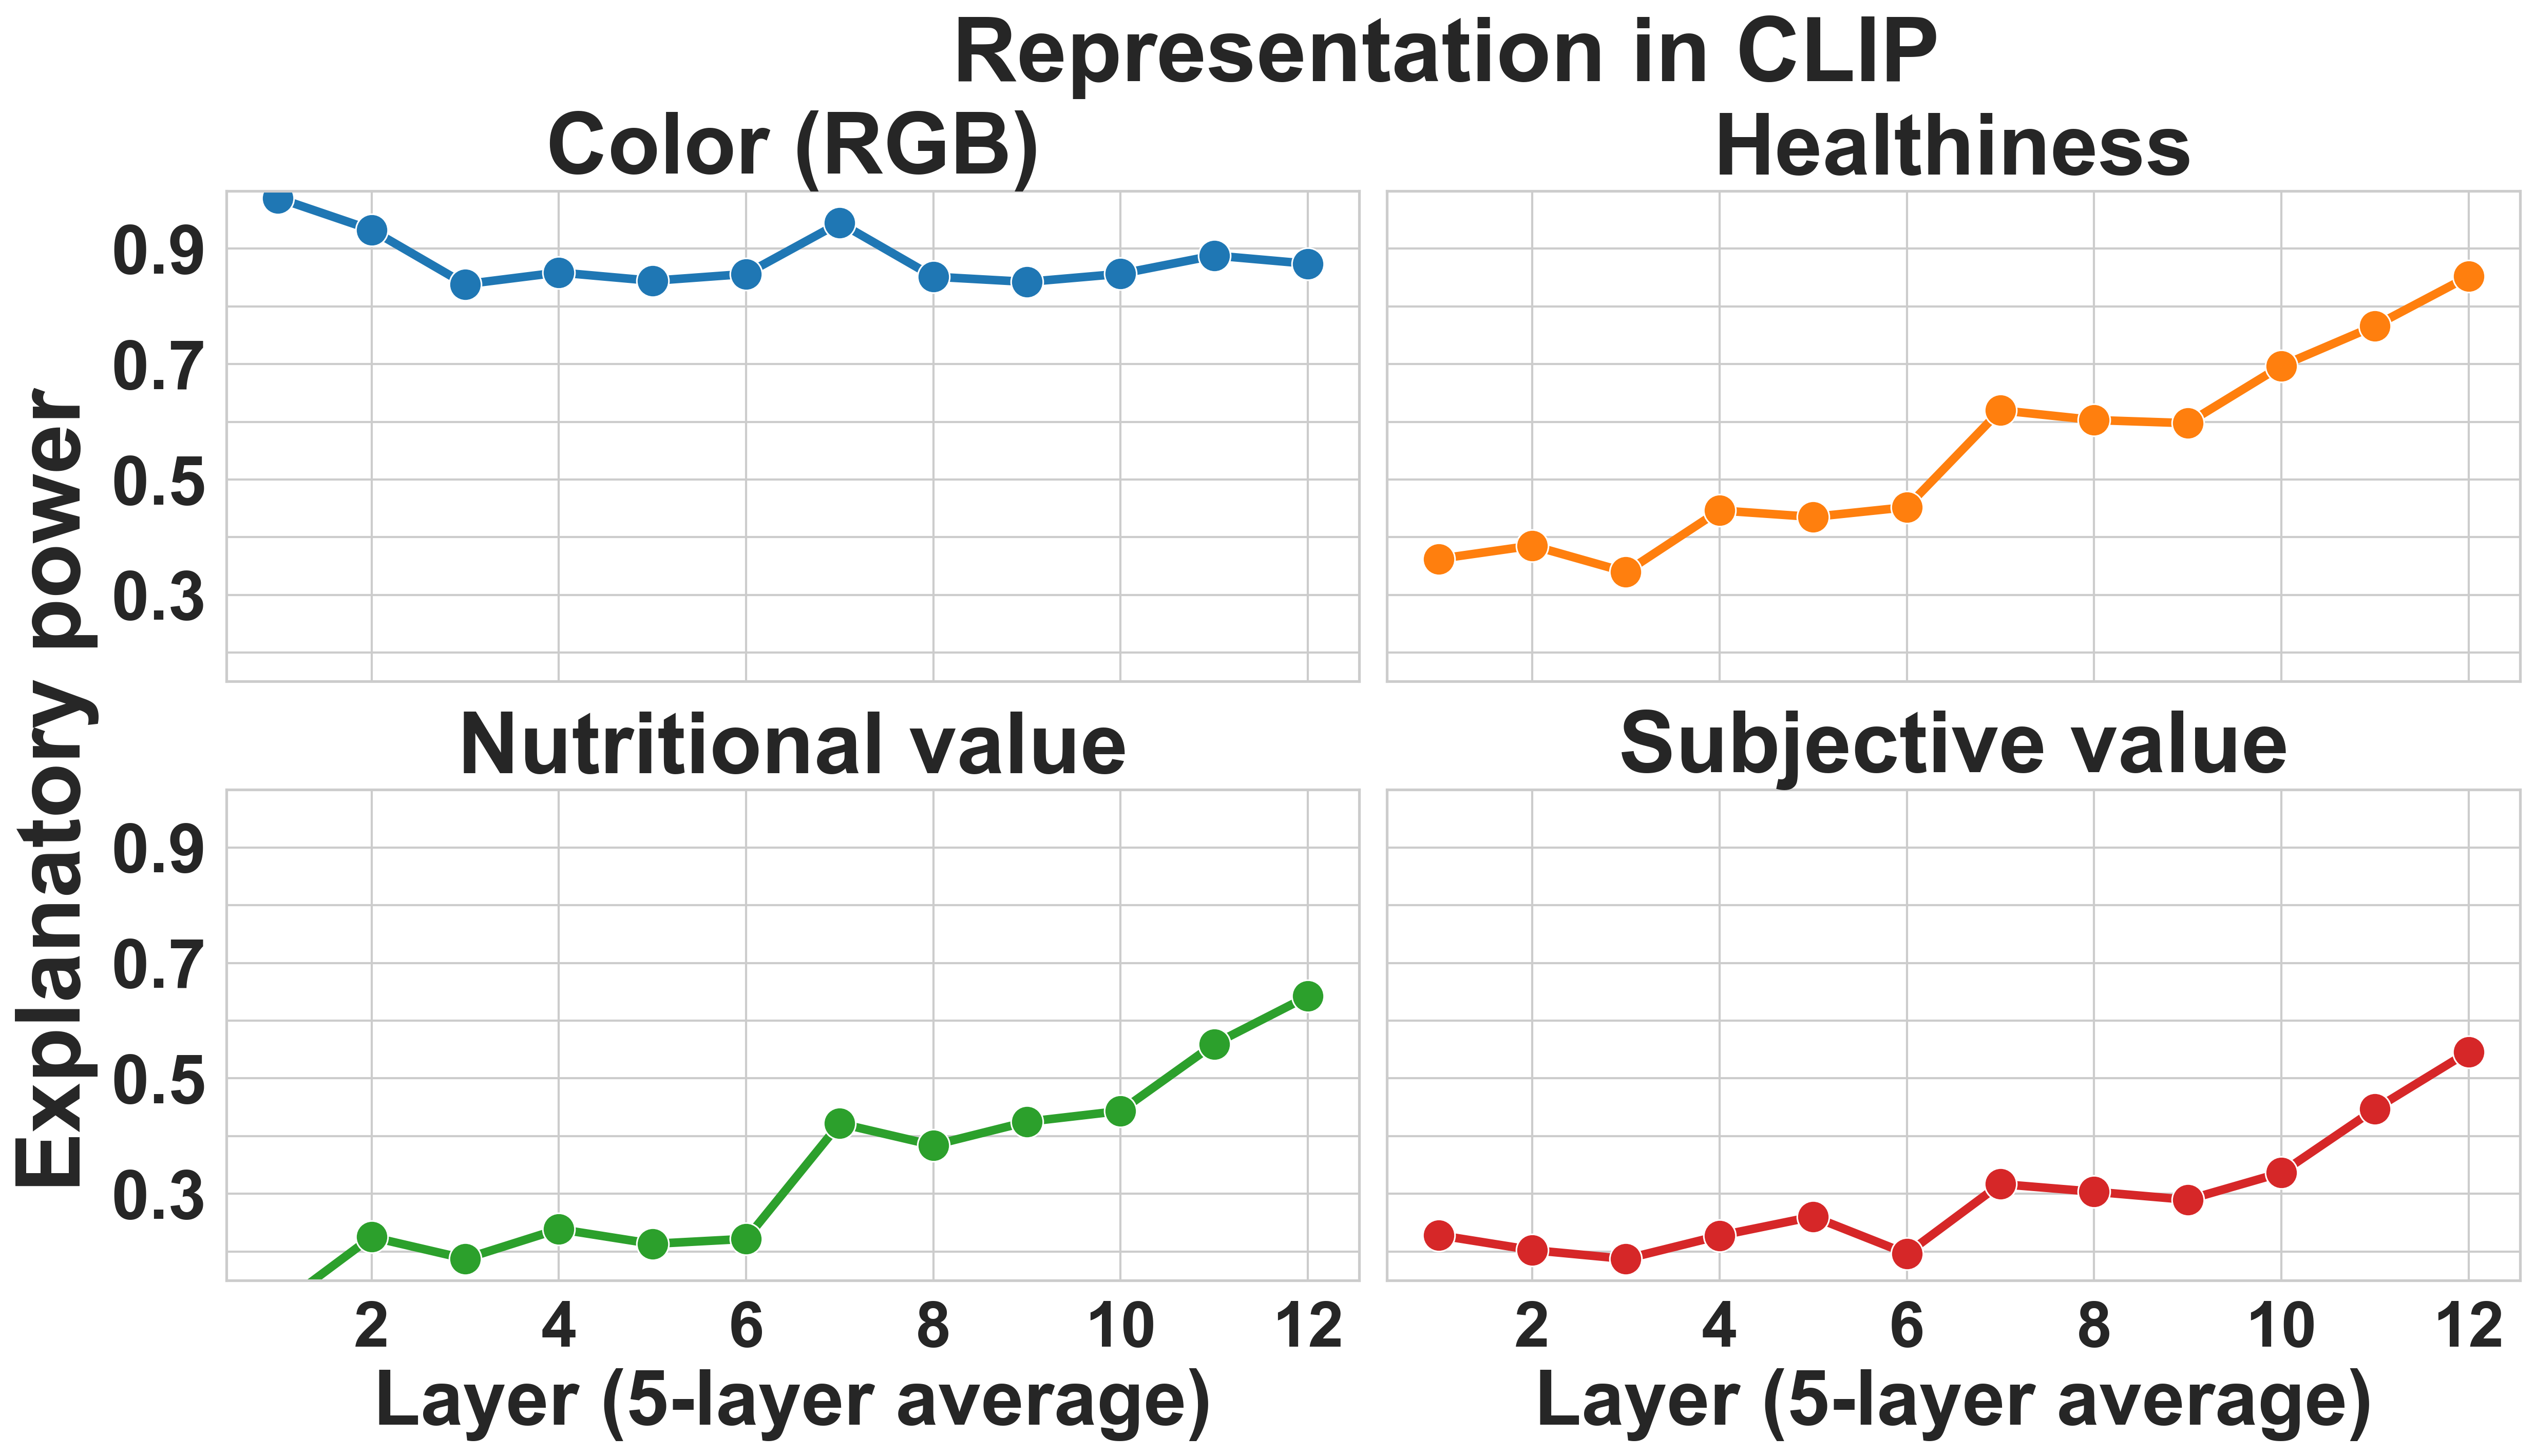

In [33]:
melt_df = (
    result_df.reset_index()
    .melt(
        id_vars=["index"],
        # value_vars=["type"],
        var_name="Layer",
        value_name="Score",
    )
    .rename(columns={"index": "attribute"})
)
melt_df["Layer"] = melt_df["Layer"].astype(str).str.extract(r"(\d+)").astype(int)

# for type_, melt_df in melt_dfs.groupby("type"):
df_list = []
group_dict = {
    "Subjective value": ["res_L_mean"],
    # "美味しさ": ["res_T_mean"],
    "Healthiness" : ["res_H_mean"],
    "Color (RGB)": ["blue", "green", "red"],
    # "カロリー": ["kcal_100g"],
    # "タンパク質": ["protein_100g"],
    # "脂質": ["fat_100g"],
    # "炭水化物": ["carbs_100g"],
    "Nutritional value": ["protein_100g", "fat_100g", "carbs_100g"],
    # "Size": ["kcal_total", "grams_total"],
}
for key, attrs in group_dict.items():
    # for attr in attrs:
    #     print(key, attr)
    attr_df = pd.DataFrame(
        melt_df[melt_df["attribute"].isin(attrs)]
        .groupby("Layer")["Score"]
        .mean().sort_index()
        .rolling(window=7, min_periods=1, step=7)
        .mean()
        .dropna()
        .reset_index(drop=True)
    )
    display(attr_df.T)
    attr_df["attr"] = key
    attr_df.index += 1
    df_list.append(attr_df)

data = pd.concat(df_list)
display(data.T)

fig, axes = plt.subplots(2, 2, figsize=(16, 9), dpi=300)
# 4つのカテゴリに対して異なる色を設定
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # tab10パレットの最初の4色

for i, (attr, d) in enumerate(data.groupby("attr")):
    ax = axes.flatten()[i]
    sns.lineplot(
        data=d.reset_index(),
        x="index",
        y="Score",
        color=colors[i],
        marker="o",
        markersize=15,
        linewidth=4,
        ax=ax
    )
    melt_df["Layer"] = melt_df["Layer"].astype("int")
    melt_df["attribute"] = melt_df["attribute"].astype("category")
    melt_df["Score"] = melt_df["Score"].astype(float)
    ax.set_ylim(0.15, 1)

    if i > 1:
        ax.set_xlabel("Layer (5-layer average)", fontsize=36, fontweight="bold")

        ax.set_xticklabels(
            range(0, 13, 2),
            fontsize=30,
            fontweight="bold",
        )
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    if i % 2 == 0:
        # ax.set_ylabel(
        #     "Explanatory power", fontsize=40, labelpad=20, fontweight="bold"
        # )
        ax.set_ylabel("")
        # 2 step刻みの目盛りを設定
        labels = ax.get_yticklabels()
        new_labels = [label if i % 2 == 0 else "" for i, label in enumerate(labels)]
        ax.set_yticklabels(new_labels, fontsize=32, fontweight="bold")
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.set_title(attr, fontsize=40, fontweight="bold", pad =-2)
# plt.title("CLIPの内部表現", fontsize=36, fontweight="bold", pad=20)
plt.tight_layout()
# 90 度回転
plt.text(s="Explanatory power", x=-14.2, y=1, fontsize=42, fontweight="bold", va="center", rotation=90)
plt.text(x=-4.2, y=2.27, s="Representation in CLIP", fontsize=42, fontweight="bold", va="center")
plt.show()
fig.savefig(
    os.path.join(DATA_PATH, "output", "activation_regression", VERSION, "pca",  f"{VERSION}2_result.png"), bbox_inches="tight"
)

## RSA

In [32]:
from scipy.stats import t

matrixs = torch.load(
    os.path.join(
        ROOT_PATH, "tmp", VERSION, "intermediate_feature", "layer_matrixs.pth"
    )
)
corr = np.corrcoef(
    fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan].flatten(),
    matrixs[28, gram_value_is_not_nan, :][:, gram_value_is_not_nan].flatten()
)[0, 1]

    # Compute p-value using SciPy
n = len(fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan].flatten())
print(n)

t_stat  = abs(corr * np.sqrt((n - 2) / (1 - corr**2)))
df = n - 2
p_value = t.sf(t_stat, df) 
print(corr,t_stat, p_value)

/tmp/ipykernel_3812876/2187198447.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  matrixs = torch.load(


NameError: name 'fat_100g_similarity_matrix' is not defined

/tmp/ipykernel_647900/220365329.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  matrixs = torch.load(


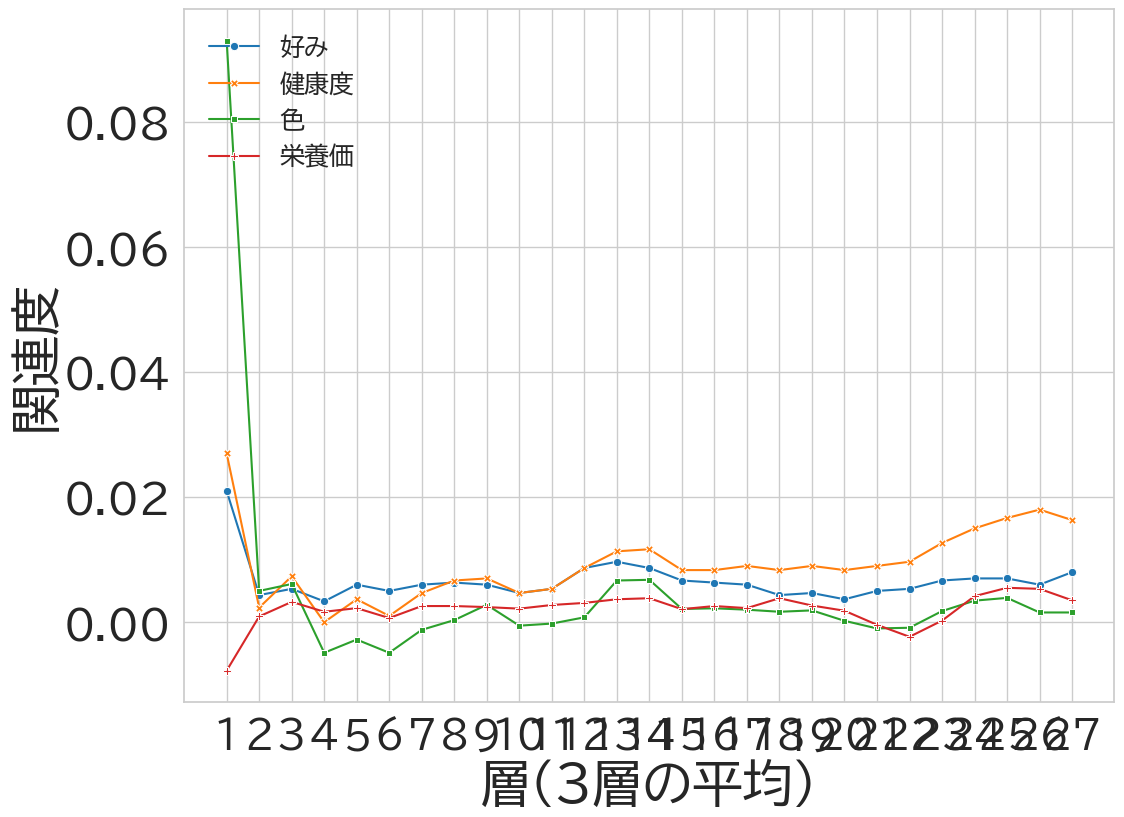

In [ ]:
from src.analysis import calc_matrix_corr

# for type_ in ["obesity", "normal"]:
matrixs = torch.load(
    os.path.join(
        ROOT_PATH, "tmp", VERSION, "intermediate_feature", "layer_matrixs.pth"
    )
)
matrixs = matrixs[:-1, :, :]

df_corr = calc_matrix_corr(matrixs, L_similarity_matrix)
likeness_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Likeness"
)
df_corr = calc_matrix_corr(matrixs, H_similarity_matrix)
healthiness_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Healthiness"
)
df_corr = calc_matrix_corr(matrixs, T_similarity_matrix)
tastiness_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Tastiness"
)
gram_value_is_not_nan = ~np.isnan(food_values["grams_total"].values)
df_corr = calc_matrix_corr(matrixs, kcal_100g_similarity_matrix)
kcal_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Kcal_100g"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    protein_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
protein_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="protein_100g"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
fat_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="fat_100g"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    carbs_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
carbs_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="carbs_100g"
)


df_corr = calc_matrix_corr(matrixs, kcal_similarity_matrix)
kcals_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Kcals"
)


df_corr = calc_matrix_corr(matrixs, processed_similarity_matrix)
processed_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Processed"
)


df_corr = calc_matrix_corr(matrixs, testy_similarity_matrix)
testy_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Testy"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    grams_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
grams_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Grams"
)


df_corr = calc_matrix_corr(matrixs, red_similarity_matrix)
red_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Red"
)


df_corr = calc_matrix_corr(matrixs, green_similarity_matrix)
green_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Green"
)


df_corr = calc_matrix_corr(matrixs, blue_similarity_matrix)
blue_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Blue"
)

df_corr = pd.concat(
    [
        likeness_corr,
        healthiness_corr,
        tastiness_corr,
        kcal_100g_corr,
        protein_100g_corr,
        fat_100g_corr,
        carbs_100g_corr,
        kcals_corr,
        processed_corr,
        testy_corr,
        grams_corr,
        red_corr,
        green_corr,
        blue_corr,
    ],
    axis=1,
)
group_dict = {
    "好み": ["Likeness"],
    # "美味しさ": ["Tastiness"],
    "健康度": ["Healthiness"],
    "色": ["Red", "Green", "Blue"],
    # "カロリー": ["Kcal_100g"],
    # "タンパク質": ["protein_100g"],
    # "脂質": ["fat_100g"],
    # "炭水化物": ["carbs_100g"],
    "栄養価": ["Kcal_100g", "protein_100g", "fat_100g", "carbs_100g"],
    # "Size": ["Kcals", "Grams"],
}
data = pd.DataFrame(
    {
        key: df_corr[attrs]
        .mean(axis=1)
        .rolling(window=3, min_periods=1, step=3)
        .mean()
        .dropna()
        .reset_index(drop=True)
        for key, attrs in group_dict.items()
    }
)

# min_max_scaler = MinMaxScaler((0,1))
fig = plt.figure(figsize=(12, 9))
sns.lineplot(data=data, dashes=False, markers=True, palette="tab10")
plt.xlabel("層(３層の平均)", fontsize=36)
plt.ylabel(
    "関連度", fontsize=36
)
plt.yticks(fontsize=30)
plt.xticks(fontsize=28)
plt.xticks(
    range(0, max(data.index.to_series().unique()) + 1),
    range(1, max(data.index.to_series().unique()) + 2),
)
plt.legend(fontsize=18, loc="upper left", borderpad=0.5, labelspacing=0.5, framealpha=0)

plt.show()
fig.savefig(os.path.join(DATA_PATH, "output", "RSA", f"{VERSION}_result.png"))